# deep learning model training
하차인원 로그만 사용해서 학습

## 데이터 전처리
학습 데이터 : 2021, 2022   
검증 데이터 : 2023

In [1]:
import pandas as pd
import numpy as np
import pickle

# df_2023 = pd.read_csv('data/learningdata2/testdata_2023.csv',encoding='utf-8')

df_2022 = pd.read_csv('data/learningdata2/testdata_2022.csv',encoding='utf-8')
df_2021 = pd.read_csv('data/learningdata2/testdata_2021.csv',encoding='utf-8')

In [2]:
df_2022.head(10)

,일시,호선,역번호,역명,주말,요일,통과호선수,미세먼지(pm10),시간,하차인원,공휴일여부,강수량(mm),평균기온,최저기온,최고기온
0,2022-01-01,1,150,서울역,1,5,4,29.0,6,560,1,0.0,-4.3,-10.2,2.3
1,2022-01-01,1,151,시청,1,5,2,29.0,6,195,1,0.0,-4.3,-10.2,2.3
2,2022-01-01,1,152,종각,1,5,1,28.0,6,136,1,0.0,-4.3,-10.2,2.3
3,2022-01-01,1,153,종로3가,1,5,3,28.0,6,139,1,0.0,-4.3,-10.2,2.3
4,2022-01-01,1,154,종로5가,1,5,1,28.0,6,80,1,0.0,-4.3,-10.2,2.3
5,2022-01-01,1,155,동대문,1,5,2,28.0,6,59,1,0.0,-4.3,-10.2,2.3
6,2022-01-01,1,156,신설동,1,5,3,29.0,6,84,1,0.0,-4.3,-10.2,2.3
7,2022-01-01,1,157,제기동,1,5,1,29.0,6,82,1,0.0,-4.3,-10.2,2.3
8,2022-01-01,1,158,청량리(서울시립대입구),1,5,1,29.0,6,129,1,0.0,-4.3,-10.2,2.3
9,2022-01-01,1,159,동묘앞,1,5,2,28.0,6,77,1,0.0,-4.3,-10.2,2.3


사용 데이터 설정 : 역번호, 요일(1~7), 통과 호선수, 미세먼지, 시간, 공휴일 여부, 강수량, 최저기온, 평균기온, 최고기온

In [3]:
def adjustDf(temp_df):
	return_df = temp_df[['호선','역번호','요일','통과호선수','미세먼지(pm10)','시간','하차인원','공휴일여부','강수량(mm)','최저기온','평균기온','최고기온']]
	# 결측치 제거
	return_df = return_df.dropna()
	# 시간 23시 제거
	return_df = return_df[return_df['시간'] != 23]
	# 하차인원 로그변환
	return_df['하차인원'] = return_df['하차인원'].apply(np.log1p)
	# Scaler
	columns_to_scale = ['미세먼지(pm10)', '평균기온', '최저기온', '최고기온', '강수량(mm)']
	with open('scaler.pkl', 'rb') as f:
		loaded_scaler = pickle.load(f)
	return_df[columns_to_scale] = loaded_scaler.transform(return_df[columns_to_scale])
	return return_df

In [4]:
adjust_df_2021 = adjustDf(df_2021)
adjust_df_2022 = adjustDf(df_2022)

In [ ]:
train_df = pd.concat([adjust_df_2021,adjust_df_2022], ignore_index=True)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424735 entries, 0 to 3424734
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   호선          int64  
 1   역번호         int64  
 2   요일          int64  
 3   통과호선수       int64  
 4   미세먼지(pm10)  float64
 5   시간          int64  
 6   하차인원        float64
 7   공휴일여부       int64  
 8   강수량(mm)     float64
 9   최저기온        float64
 10  평균기온        float64
 11  최고기온        float64
dtypes: float64(6), int64(6)
memory usage: 313.5 MB


In [6]:
'''
from sklearn.preprocessing import StandardScaler

# 표준화할 컬럼 선택
columns_to_scale = ['미세먼지(pm10)', '평균기온', '최저기온', '최고기온', '강수량(mm)']

# 표준화 진행
scaler = StandardScaler()
train_df[columns_to_scale] = scaler.fit_transform(train_df[columns_to_scale])

import pickle
# Scaler 저장
with open('../models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
'''

"\nfrom sklearn.preprocessing import StandardScaler\n\n# 표준화할 컬럼 선택\ncolumns_to_scale = ['미세먼지(pm10)', '평균기온', '최저기온', '최고기온', '강수량(mm)']\n\n# 표준화 진행\nscaler = StandardScaler()\ntrain_df[columns_to_scale] = scaler.fit_transform(train_df[columns_to_scale])\n\nimport pickle\n# Scaler 저장\nwith open('../models/scaler.pkl', 'wb') as f:\n    pickle.dump(scaler, f)\n"

## 데이터 전처리 2

In [24]:
import pandas as pd
import numpy as np
import pickle

# df_2023 = pd.read_csv('data/learningdata2/testdata_2023.csv',encoding='utf-8')

df_2022 = pd.read_csv('data/learningdata2/testdata_2022.csv',encoding='utf-8')
df_2021 = pd.read_csv('data/learningdata2/testdata_2021.csv',encoding='utf-8')
df_2022.head(10)

,일시,호선,역번호,역명,주말,요일,통과호선수,미세먼지(pm10),시간,하차인원,공휴일여부,강수량(mm),평균기온,최저기온,최고기온
0,2022-01-01,1,150,서울역,1,5,4,29.0,6,560,1,0.0,-4.3,-10.2,2.3
1,2022-01-01,1,151,시청,1,5,2,29.0,6,195,1,0.0,-4.3,-10.2,2.3
2,2022-01-01,1,152,종각,1,5,1,28.0,6,136,1,0.0,-4.3,-10.2,2.3
3,2022-01-01,1,153,종로3가,1,5,3,28.0,6,139,1,0.0,-4.3,-10.2,2.3
4,2022-01-01,1,154,종로5가,1,5,1,28.0,6,80,1,0.0,-4.3,-10.2,2.3
5,2022-01-01,1,155,동대문,1,5,2,28.0,6,59,1,0.0,-4.3,-10.2,2.3
6,2022-01-01,1,156,신설동,1,5,3,29.0,6,84,1,0.0,-4.3,-10.2,2.3
7,2022-01-01,1,157,제기동,1,5,1,29.0,6,82,1,0.0,-4.3,-10.2,2.3
8,2022-01-01,1,158,청량리(서울시립대입구),1,5,1,29.0,6,129,1,0.0,-4.3,-10.2,2.3
9,2022-01-01,1,159,동묘앞,1,5,2,28.0,6,77,1,0.0,-4.3,-10.2,2.3


In [25]:
def adjustDf(temp_df):
	return_df = temp_df[['호선','역번호','주말','요일','통과호선수','미세먼지(pm10)','시간','하차인원','공휴일여부','강수량(mm)','최저기온','평균기온','최고기온']]
	# 결측치 제거
	return_df = return_df.dropna()
	# 시간 23시 제거
	return_df = return_df[return_df['시간'] != 23]
	# 하차인원 로그변환
	return_df['하차인원'] = return_df['하차인원'].apply(np.log1p)
	# Scaler
	columns_to_scale = ['미세먼지(pm10)', '평균기온', '최저기온', '최고기온', '강수량(mm)']
	with open('scaler.pkl', 'rb') as f:
		loaded_scaler = pickle.load(f)
	return_df[columns_to_scale] = loaded_scaler.transform(return_df[columns_to_scale])
	return return_df

In [26]:
adjust_df_2021 = adjustDf(df_2021)
adjust_df_2022 = adjustDf(df_2022)

train_df = pd.concat([adjust_df_2021,adjust_df_2022], ignore_index=True)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424735 entries, 0 to 3424734
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   호선          int64  
 1   역번호         int64  
 2   주말          int64  
 3   요일          int64  
 4   통과호선수       int64  
 5   미세먼지(pm10)  float64
 6   시간          int64  
 7   하차인원        float64
 8   공휴일여부       int64  
 9   강수량(mm)     float64
 10  최저기온        float64
 11  평균기온        float64
 12  최고기온        float64
dtypes: float64(6), int64(7)
memory usage: 339.7 MB


## 데이터 전처리 3

In [1]:
import pandas as pd
import numpy as np
import pickle

# df_2023 = pd.read_csv('data/learningdata2/testdata_2023.csv',encoding='utf-8')

df_2022 = pd.read_csv('data/learningdata2/testdata_2022.csv',encoding='utf-8')
df_2021 = pd.read_csv('data/learningdata2/testdata_2021.csv',encoding='utf-8')
df_2022.head(10)

,일시,호선,역번호,역명,주말,요일,통과호선수,미세먼지(pm10),시간,하차인원,공휴일여부,강수량(mm),평균기온,최저기온,최고기온
0,2022-01-01,1,150,서울역,1,5,4,29.0,6,560,1,0.0,-4.3,-10.2,2.3
1,2022-01-01,1,151,시청,1,5,2,29.0,6,195,1,0.0,-4.3,-10.2,2.3
2,2022-01-01,1,152,종각,1,5,1,28.0,6,136,1,0.0,-4.3,-10.2,2.3
3,2022-01-01,1,153,종로3가,1,5,3,28.0,6,139,1,0.0,-4.3,-10.2,2.3
4,2022-01-01,1,154,종로5가,1,5,1,28.0,6,80,1,0.0,-4.3,-10.2,2.3
5,2022-01-01,1,155,동대문,1,5,2,28.0,6,59,1,0.0,-4.3,-10.2,2.3
6,2022-01-01,1,156,신설동,1,5,3,29.0,6,84,1,0.0,-4.3,-10.2,2.3
7,2022-01-01,1,157,제기동,1,5,1,29.0,6,82,1,0.0,-4.3,-10.2,2.3
8,2022-01-01,1,158,청량리(서울시립대입구),1,5,1,29.0,6,129,1,0.0,-4.3,-10.2,2.3
9,2022-01-01,1,159,동묘앞,1,5,2,28.0,6,77,1,0.0,-4.3,-10.2,2.3


In [2]:
def adjustDf(temp_df):
    return_df = temp_df[temp_df['호선']==7]
    return_df = return_df[['역번호','주말','요일','통과호선수','미세먼지(pm10)','시간','하차인원','공휴일여부','강수량(mm)','최저기온','평균기온','최고기온']]
	# 결측치 제거
    return_df = return_df.dropna()
	# 시간 23시 제거
    return_df = return_df[return_df['시간'] != 23]
	# 하차인원 로그변환
    return_df['하차인원'] = return_df['하차인원'].apply(np.log1p)
	# Scaler
    columns_to_scale = ['미세먼지(pm10)', '평균기온', '최저기온', '최고기온', '강수량(mm)']
    with open('scaler.pkl', 'rb') as f:
        loaded_scaler = pickle.load(f)
    return_df[columns_to_scale] = loaded_scaler.transform(return_df[columns_to_scale])
    return return_df

In [3]:
adjust_df_2021 = adjustDf(df_2021)
adjust_df_2022 = adjustDf(df_2022)

train_df = pd.concat([adjust_df_2021,adjust_df_2022], ignore_index=True)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576504 entries, 0 to 576503
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   역번호         576504 non-null  int64  
 1   주말          576504 non-null  int64  
 2   요일          576504 non-null  int64  
 3   통과호선수       576504 non-null  int64  
 4   미세먼지(pm10)  576504 non-null  float64
 5   시간          576504 non-null  int64  
 6   하차인원        576504 non-null  float64
 7   공휴일여부       576504 non-null  int64  
 8   강수량(mm)     576504 non-null  float64
 9   최저기온        576504 non-null  float64
 10  평균기온        576504 non-null  float64
 11  최고기온        576504 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 52.8 MB


## 딥러닝 모델 학습

In [6]:
train_df.sample(n=10, random_state=42)

,역번호,주말,요일,통과호선수,미세먼지(pm10),시간,하차인원,공휴일여부,강수량(mm),최저기온,평균기온,최고기온
165477,2744,1,6,2,2.960892,14,5.488938,0,0.137785,-0.165167,-0.290743,-0.487067
183821,2728,0,1,1,0.525642,15,6.285998,0,-0.268130,-0.454642,-0.468044,-0.440061
35134,2757,1,5,1,3.394566,7,5.337538,0,-0.268130,-0.237535,-0.290743,-0.252034
45995,2755,0,0,1,0.192046,8,7.720905,0,-0.268130,0.884180,0.941033,0.960741
292908,2726,1,6,1,-0.942180,21,5.849325,0,-0.268130,0.811811,0.847716,0.847924
155518,2730,0,0,1,-0.508505,14,5.583496,0,-0.268130,0.205723,-0.029457,-0.346047
122870,2722,1,6,1,-0.608584,12,6.040255,0,0.605619,1.354577,1.239645,1.299189
423859,2742,1,5,1,0.859238,13,5.886104,0,-0.268130,-1.304974,-1.233239,-1.370794
139317,2747,1,5,1,-0.575225,13,6.248043,0,0.041466,0.947503,0.866380,0.791516
146224,2718,0,1,1,-0.842101,13,6.329721,0,-0.130532,-0.581287,-0.803983,-1.107556


1. MLP 모델
2. RNN, LSTM, GRU
3. Attention mechanism

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3060 Ti'

In [9]:
X = (train_df.drop(['하차인원', '역번호'], axis=1)).values
X_station = (train_df[['역번호']]).values
y = (train_df[['하차인원']]).values

X_train, X_val, X_station_train, X_station_val, y_train, y_val = train_test_split(X, X_station, y, test_size=0.1, random_state=42)

In [10]:
print(X_train.shape, X_val.shape, X_station_train.shape, X_station_val.shape, y_train.shape, y_val.shape)

(518853, 10) (57651, 10) (518853, 1) (57651, 1) (518853, 1) (57651, 1)


In [11]:
# PyTorch 텐서로 변환
X_train_tensor = torch.FloatTensor(X_train)
X_station_train_tensor = torch.LongTensor(X_station_train)  # 역번호는 범주형이므로 LongTensor로 변환
y_train_tensor = torch.FloatTensor(y_train)

X_val_tensor = torch.FloatTensor(X_val)
X_station_val_tensor = torch.LongTensor(X_station_val)
y_val_tensor = torch.FloatTensor(y_val)

# 데이터셋 및 데이터로더 구성
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, X_station_train_tensor, y_train_tensor)
val_dataset = torch.utils.data.TensorDataset(X_val_tensor, X_station_val_tensor, y_val_tensor)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32)

## 딥러닝 모델 학습 1

### 기본 모델

In [13]:
class MLPWithEmbedding(nn.Module):
    def __init__(self, num_stations, embedding_dim, input_size):
        super(MLPWithEmbedding, self).__init__()
        # 역번호에 대한 임베딩 레이어
        self.embedding = nn.Embedding(num_stations, embedding_dim)
        
        # 임베딩 레이어와 다른 연속형 피처를 결합한 후 MLP를 구성
        self.fc1 = nn.Linear(embedding_dim + input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x_numeric, x_station):
        # 역번호 임베딩 처리
        x_station_embedded = self.embedding(x_station)
        x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
        
        # 임베딩된 역번호와 연속형 피처 결합
        x = torch.cat([x_numeric, x_station_embedded], dim=1)
        
        # MLP 모델 진행
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

num_stations = np.max(X_station_train) + 1

# 모델 초기화
embedding_dim = 8  # 임베딩 벡터의 차원
input_size = X_train.shape[1]  # 연속형 피처 수
model = MLPWithEmbedding(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()  # 회귀 문제이므로 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('mps' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

# 학습 및 검증
num_epochs = 100
train_losses = []
val_losses = []

y_train_tensor = y_train_tensor.view(-1, 1)
y_val_tensor = y_val_tensor.view(-1, 1)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for inputs_numeric, inputs_station, targets in train_loader:
        inputs_numeric = inputs_numeric.to(device)
        inputs_station = inputs_station.to(device)
        targets = targets.to(device).view(-1, 1)  # 타겟 텐서 크기 변환
        
        optimizer.zero_grad()
        outputs = model(inputs_numeric, inputs_station)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs_numeric.size(0)
    
    train_loss = running_loss / len(train_loader.dataset)
    
    # TensorBoard에 학습 손실 기록
    writer.add_scalar('Training Loss', train_loss, epoch)

    # 검증
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs_numeric, inputs_station, targets in val_loader:
            inputs_numeric = inputs_numeric.to(device)
            inputs_station = inputs_station.to(device)
            targets = targets.to(device).view(-1, 1)  # 타겟 텐서 크기 변환
            
            outputs = model(inputs_numeric, inputs_station)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs_numeric.size(0)
    
    val_loss = val_loss / len(val_loader.dataset)
    
    # TensorBoard에 검증 손실 기록
    writer.add_scalar('Validation Loss', val_loss, epoch)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# 학습이 끝난 후 TensorBoard 기록 종료
writer.close()

In [15]:
torch.save(model.state_dict(),'model_weights_1.pth')

### 모델 수정

In [16]:
class MLPWithEmbedding2(nn.Module):
    def __init__(self, num_stations, embedding_dim, input_size):
        super(MLPWithEmbedding2, self).__init__()
        # 역번호에 대한 임베딩 레이어
        self.embedding = nn.Embedding(num_stations, embedding_dim)
        
        # 임베딩 레이어와 다른 연속형 피처를 결합한 후 MLP를 구성
        self.fc1 = nn.Linear(embedding_dim + input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        
        self.batch_norm1 = nn.BatchNorm1d(128)
        self.batch_norm2 = nn.BatchNorm1d(64)
        self.batch_norm3 = nn.BatchNorm1d(32)
    
    def forward(self, x_numeric, x_station):
        # 역번호 임베딩 처리
        x_station_embedded = self.embedding(x_station)
        x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
        
        # 임베딩된 역번호와 연속형 피처 결합
        x = torch.cat([x_numeric, x_station_embedded], dim=1)
        
        # MLP 모델 진행
        x = self.fc1(x)
        x = self.batch_norm1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.batch_norm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.fc3(x)
        x = self.batch_norm3(x)
        x = self.relu(x)
        
        x = self.fc4(x)
        return x

In [ ]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

num_stations = np.max(X_station_train) + 1

# 모델 초기화
embedding_dim = 8  # 임베딩 벡터의 차원
input_size = X_train.shape[1]  # 연속형 피처 수
model = MLPWithEmbedding2(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()  # 회귀 문제이므로 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('mps' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

# 학습 및 검증
num_epochs = 100
train_losses = []
val_losses = []

y_train_tensor = y_train_tensor.view(-1, 1)
y_val_tensor = y_val_tensor.view(-1, 1)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for inputs_numeric, inputs_station, targets in train_loader:
        inputs_numeric = inputs_numeric.to(device)
        inputs_station = inputs_station.to(device)
        targets = targets.to(device).view(-1, 1)  # 타겟 텐서 크기 변환
        
        optimizer.zero_grad()
        outputs = model(inputs_numeric, inputs_station)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs_numeric.size(0)
    
    train_loss = running_loss / len(train_loader.dataset)
    
    # TensorBoard에 학습 손실 기록
    writer.add_scalar('Training Loss', train_loss, epoch)

    # 검증
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs_numeric, inputs_station, targets in val_loader:
            inputs_numeric = inputs_numeric.to(device)
            inputs_station = inputs_station.to(device)
            targets = targets.to(device).view(-1, 1)  # 타겟 텐서 크기 변환
            
            outputs = model(inputs_numeric, inputs_station)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs_numeric.size(0)
    
    val_loss = val_loss / len(val_loader.dataset)
    
    # TensorBoard에 검증 손실 기록
    writer.add_scalar('Validation Loss', val_loss, epoch)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# 학습이 끝난 후 TensorBoard 기록 종료
writer.close()

In [18]:
torch.save(model.state_dict(),'model_weights_2.pth')

### 모델 수정 2차

In [13]:
class MLPWithEmbedding3(nn.Module):
    def __init__(self, num_stations, embedding_dim, input_size):
        super(MLPWithEmbedding3, self).__init__()
        # 역번호에 대한 임베딩 레이어
        self.embedding = nn.Embedding(num_stations, embedding_dim)
        
        # 임베딩 레이어와 다른 연속형 피처를 결합한 후 MLP를 구성
        self.fc1 = nn.Linear(embedding_dim + input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x_numeric, x_station):
        # 역번호 임베딩 처리
        x_station_embedded = self.embedding(x_station)
        x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
        
        # 임베딩된 역번호와 연속형 피처 결합
        x = torch.cat([x_numeric, x_station_embedded], dim=1)
        
        # MLP 모델 진행
        x = self.fc1(x)
        x = self.relu(x)
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        
        x = self.fc3(x)
        return x

In [14]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

num_stations = np.max(X_station_train) + 1

# 모델 초기화
embedding_dim = 8  # 임베딩 벡터의 차원
input_size = X_train.shape[1]  # 연속형 피처 수
model = MLPWithEmbedding3(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()  # 회귀 문제이므로 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('mps' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

# 학습 및 검증
num_epochs = 100
train_losses = []
val_losses = []

y_train_tensor = y_train_tensor.view(-1, 1)
y_val_tensor = y_val_tensor.view(-1, 1)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for inputs_numeric, inputs_station, targets in train_loader:
        inputs_numeric = inputs_numeric.to(device)
        inputs_station = inputs_station.to(device)
        targets = targets.to(device).view(-1, 1)  # 타겟 텐서 크기 변환
        
        optimizer.zero_grad()
        outputs = model(inputs_numeric, inputs_station)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs_numeric.size(0)
    
    train_loss = running_loss / len(train_loader.dataset)
    
    # TensorBoard에 학습 손실 기록
    writer.add_scalar('Training Loss', train_loss, epoch)

    # 검증
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs_numeric, inputs_station, targets in val_loader:
            inputs_numeric = inputs_numeric.to(device)
            inputs_station = inputs_station.to(device)
            targets = targets.to(device).view(-1, 1)  # 타겟 텐서 크기 변환
            
            outputs = model(inputs_numeric, inputs_station)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs_numeric.size(0)
    
    val_loss = val_loss / len(val_loader.dataset)
    
    # TensorBoard에 검증 손실 기록
    writer.add_scalar('Validation Loss', val_loss, epoch)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# 학습이 끝난 후 TensorBoard 기록 종료
writer.close()

Epoch [1/100], Train Loss: 0.3057, Validation Loss: 0.1985
Epoch [2/100], Train Loss: 0.1776, Validation Loss: 0.1824
Epoch [3/100], Train Loss: 0.1577, Validation Loss: 0.1766
Epoch [4/100], Train Loss: 0.1448, Validation Loss: 0.1708
Epoch [5/100], Train Loss: 0.1299, Validation Loss: 0.1471
Epoch [6/100], Train Loss: 0.1167, Validation Loss: 0.1511
Epoch [7/100], Train Loss: 0.1130, Validation Loss: 0.1403
Epoch [8/100], Train Loss: 0.1113, Validation Loss: 0.1434
Epoch [9/100], Train Loss: 0.1100, Validation Loss: 0.1521
Epoch [10/100], Train Loss: 0.1087, Validation Loss: 0.1415
Epoch [11/100], Train Loss: 0.1068, Validation Loss: 0.1430
Epoch [12/100], Train Loss: 0.1044, Validation Loss: 0.1580
Epoch [13/100], Train Loss: 0.1038, Validation Loss: 0.1660
Epoch [14/100], Train Loss: 0.1032, Validation Loss: 0.1321
Epoch [15/100], Train Loss: 0.1026, Validation Loss: 0.1687
Epoch [16/100], Train Loss: 0.1019, Validation Loss: 0.1466
Epoch [17/100], Train Loss: 0.1011, Validation Lo

In [15]:
torch.save(model.state_dict(),'model_weights_3.pth')

### 모델 수정 3차

In [16]:
class MLPWithEmbedding4(nn.Module):
    def __init__(self, num_stations, embedding_dim, input_size):
        super(MLPWithEmbedding4, self).__init__()
        # 역번호에 대한 임베딩 레이어
        self.embedding = nn.Embedding(num_stations, embedding_dim)
        
        # 임베딩 레이어와 다른 연속형 피처를 결합한 후 MLP를 구성
        self.fc1 = nn.Linear(embedding_dim + input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batch_norm1 = nn.BatchNorm1d(64)
        self.batch_norm2 = nn.BatchNorm1d(32)
    
    def forward(self, x_numeric, x_station):
        # 역번호 임베딩 처리
        x_station_embedded = self.embedding(x_station)
        x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
        
        # 임베딩된 역번호와 연속형 피처 결합
        x = torch.cat([x_numeric, x_station_embedded], dim=1)
        
        # MLP 모델 진행
        x = self.fc1(x)
        x = self.batch_norm1(x)
        x = self.relu(x)
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.batch_norm2(x)
        x = self.relu(x)
        
        x = self.fc3(x)
        return x

In [17]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

num_stations = np.max(X_station_train) + 1

# 모델 초기화
embedding_dim = 8  # 임베딩 벡터의 차원
input_size = X_train.shape[1]  # 연속형 피처 수
model = MLPWithEmbedding4(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()  # 회귀 문제이므로 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.0005)

device = torch.device('mps' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

# 학습 및 검증
num_epochs = 100
train_losses = []
val_losses = []

y_train_tensor = y_train_tensor.view(-1, 1)
y_val_tensor = y_val_tensor.view(-1, 1)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for inputs_numeric, inputs_station, targets in train_loader:
        inputs_numeric = inputs_numeric.to(device)
        inputs_station = inputs_station.to(device)
        targets = targets.to(device).view(-1, 1)  # 타겟 텐서 크기 변환
        
        optimizer.zero_grad()
        outputs = model(inputs_numeric, inputs_station)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs_numeric.size(0)
    
    train_loss = running_loss / len(train_loader.dataset)
    
    # TensorBoard에 학습 손실 기록
    writer.add_scalar('Training Loss', train_loss, epoch)

    # 검증
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs_numeric, inputs_station, targets in val_loader:
            inputs_numeric = inputs_numeric.to(device)
            inputs_station = inputs_station.to(device)
            targets = targets.to(device).view(-1, 1)  # 타겟 텐서 크기 변환
            
            outputs = model(inputs_numeric, inputs_station)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs_numeric.size(0)
    
    val_loss = val_loss / len(val_loader.dataset)
    
    # TensorBoard에 검증 손실 기록
    writer.add_scalar('Validation Loss', val_loss, epoch)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# 학습이 끝난 후 TensorBoard 기록 종료
writer.close()

Epoch [1/100], Train Loss: 0.4346, Validation Loss: 0.1571
Epoch [2/100], Train Loss: 0.2363, Validation Loss: 0.1445
Epoch [3/100], Train Loss: 0.2113, Validation Loss: 0.1476
Epoch [4/100], Train Loss: 0.1988, Validation Loss: 0.1394
Epoch [5/100], Train Loss: 0.1903, Validation Loss: 0.1283
Epoch [6/100], Train Loss: 0.1840, Validation Loss: 0.1388
Epoch [7/100], Train Loss: 0.1802, Validation Loss: 0.1404
Epoch [8/100], Train Loss: 0.1782, Validation Loss: 0.1314
Epoch [9/100], Train Loss: 0.1758, Validation Loss: 0.1302
Epoch [10/100], Train Loss: 0.1738, Validation Loss: 0.1485
Epoch [11/100], Train Loss: 0.1722, Validation Loss: 0.1639
Epoch [12/100], Train Loss: 0.1713, Validation Loss: 0.1479
Epoch [13/100], Train Loss: 0.1699, Validation Loss: 0.1826
Epoch [14/100], Train Loss: 0.1692, Validation Loss: 0.1562
Epoch [15/100], Train Loss: 0.1683, Validation Loss: 0.1517
Epoch [16/100], Train Loss: 0.1682, Validation Loss: 0.1363
Epoch [17/100], Train Loss: 0.1671, Validation Lo

In [18]:
torch.save(model.state_dict(),'model_weights_4.pth')

### 모델 수정 4차

In [40]:
class MLPWithEmbedding5(nn.Module):
    def __init__(self, num_stations, embedding_dim, input_size):
        super(MLPWithEmbedding5, self).__init__()
        # 역번호에 대한 임베딩 레이어
        self.embedding = nn.Embedding(num_stations, embedding_dim)
        
        # 임베딩 레이어와 다른 연속형 피처를 결합한 후 MLP를 구성
        self.fc1 = nn.Linear(embedding_dim + input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.fc5 = nn.Linear(16, 1)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3)
        self.batch_norm1 = nn.BatchNorm1d(128)
        self.batch_norm2 = nn.BatchNorm1d(64)
        self.batch_norm3 = nn.BatchNorm1d(32)
        self.batch_norm4 = nn.BatchNorm1d(16)
    
    def forward(self, x_numeric, x_station):
        # 역번호 임베딩 처리
        x_station_embedded = self.embedding(x_station)
        x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
        
        # 임베딩된 역번호와 연속형 피처 결합
        x = torch.cat([x_numeric, x_station_embedded], dim=1)
        
        # MLP 모델 진행
        x = self.fc1(x)
        x = self.batch_norm1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.batch_norm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.fc3(x)
        x = self.batch_norm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.fc4(x)
        x = self.batch_norm4(x)
        x = self.relu(x)
        
        x = self.fc5(x)
        return x

In [41]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

num_stations = np.max(X_station_train) + 1

# 모델 초기화
embedding_dim = 8  # 임베딩 벡터의 차원
input_size = X_train.shape[1]  # 연속형 피처 수
model = MLPWithEmbedding5(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()  # 회귀 문제이므로 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.0005)

device = torch.device('mps' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

# 학습 및 검증
num_epochs = 200
train_losses = []
val_losses = []

y_train_tensor = y_train_tensor.view(-1, 1)
y_val_tensor = y_val_tensor.view(-1, 1)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for inputs_numeric, inputs_station, targets in train_loader:
        inputs_numeric = inputs_numeric.to(device)
        inputs_station = inputs_station.to(device)
        targets = targets.to(device).view(-1, 1)  # 타겟 텐서 크기 변환
        
        optimizer.zero_grad()
        outputs = model(inputs_numeric, inputs_station)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs_numeric.size(0)
    
    train_loss = running_loss / len(train_loader.dataset)
    
    # TensorBoard에 학습 손실 기록
    writer.add_scalar('Training Loss', train_loss, epoch)

    # 검증
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs_numeric, inputs_station, targets in val_loader:
            inputs_numeric = inputs_numeric.to(device)
            inputs_station = inputs_station.to(device)
            targets = targets.to(device).view(-1, 1)  # 타겟 텐서 크기 변환
            
            outputs = model(inputs_numeric, inputs_station)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs_numeric.size(0)
    
    val_loss = val_loss / len(val_loader.dataset)
    
    # TensorBoard에 검증 손실 기록
    writer.add_scalar('Validation Loss', val_loss, epoch)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# 학습이 끝난 후 TensorBoard 기록 종료
writer.close()

Epoch [1/200], Train Loss: 0.5263, Validation Loss: 0.1636
Epoch [2/200], Train Loss: 0.2273, Validation Loss: 0.1508
Epoch [3/200], Train Loss: 0.2118, Validation Loss: 0.1984
Epoch [4/200], Train Loss: 0.2044, Validation Loss: 0.1785
Epoch [5/200], Train Loss: 0.1992, Validation Loss: 0.1967
Epoch [6/200], Train Loss: 0.1957, Validation Loss: 0.1700
Epoch [7/200], Train Loss: 0.1926, Validation Loss: 0.1768
Epoch [8/200], Train Loss: 0.1904, Validation Loss: 0.1973
Epoch [9/200], Train Loss: 0.1884, Validation Loss: 0.2017
Epoch [10/200], Train Loss: 0.1869, Validation Loss: 0.2126
Epoch [11/200], Train Loss: 0.1852, Validation Loss: 0.2133
Epoch [12/200], Train Loss: 0.1839, Validation Loss: 0.2121
Epoch [13/200], Train Loss: 0.1821, Validation Loss: 0.1657
Epoch [14/200], Train Loss: 0.1811, Validation Loss: 0.2202
Epoch [15/200], Train Loss: 0.1798, Validation Loss: 0.2188
Epoch [16/200], Train Loss: 0.1792, Validation Loss: 0.1931
Epoch [17/200], Train Loss: 0.1780, Validation Lo

In [42]:
torch.save(model.state_dict(),'model_weights_5.pth')

### 모델 수정 5차(2차 200번으로 횟수만 수정)

In [43]:
class MLPWithEmbedding3(nn.Module):
    def __init__(self, num_stations, embedding_dim, input_size):
        super(MLPWithEmbedding3, self).__init__()
        # 역번호에 대한 임베딩 레이어
        self.embedding = nn.Embedding(num_stations, embedding_dim)
        
        # 임베딩 레이어와 다른 연속형 피처를 결합한 후 MLP를 구성
        self.fc1 = nn.Linear(embedding_dim + input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x_numeric, x_station):
        # 역번호 임베딩 처리
        x_station_embedded = self.embedding(x_station)
        x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
        
        # 임베딩된 역번호와 연속형 피처 결합
        x = torch.cat([x_numeric, x_station_embedded], dim=1)
        
        # MLP 모델 진행
        x = self.fc1(x)
        x = self.relu(x)
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        
        x = self.fc3(x)
        return x

In [44]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

num_stations = np.max(X_station_train) + 1

# 모델 초기화
embedding_dim = 8  # 임베딩 벡터의 차원
input_size = X_train.shape[1]  # 연속형 피처 수
model = MLPWithEmbedding3(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()  # 회귀 문제이므로 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('mps' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

# 학습 및 검증
num_epochs = 200
train_losses = []
val_losses = []

y_train_tensor = y_train_tensor.view(-1, 1)
y_val_tensor = y_val_tensor.view(-1, 1)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for inputs_numeric, inputs_station, targets in train_loader:
        inputs_numeric = inputs_numeric.to(device)
        inputs_station = inputs_station.to(device)
        targets = targets.to(device).view(-1, 1)  # 타겟 텐서 크기 변환
        
        optimizer.zero_grad()
        outputs = model(inputs_numeric, inputs_station)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs_numeric.size(0)
    
    train_loss = running_loss / len(train_loader.dataset)
    
    # TensorBoard에 학습 손실 기록
    writer.add_scalar('Training Loss', train_loss, epoch)

    # 검증
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs_numeric, inputs_station, targets in val_loader:
            inputs_numeric = inputs_numeric.to(device)
            inputs_station = inputs_station.to(device)
            targets = targets.to(device).view(-1, 1)  # 타겟 텐서 크기 변환
            
            outputs = model(inputs_numeric, inputs_station)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs_numeric.size(0)
    
    val_loss = val_loss / len(val_loader.dataset)
    
    # TensorBoard에 검증 손실 기록
    writer.add_scalar('Validation Loss', val_loss, epoch)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# 학습이 끝난 후 TensorBoard 기록 종료
writer.close()

Epoch [1/200], Train Loss: 0.2809, Validation Loss: 0.1538
Epoch [2/200], Train Loss: 0.1627, Validation Loss: 0.1246
Epoch [3/200], Train Loss: 0.1367, Validation Loss: 0.1080
Epoch [4/200], Train Loss: 0.1205, Validation Loss: 0.1117
Epoch [5/200], Train Loss: 0.1103, Validation Loss: 0.1010
Epoch [6/200], Train Loss: 0.1034, Validation Loss: 0.1131
Epoch [7/200], Train Loss: 0.0998, Validation Loss: 0.0987
Epoch [8/200], Train Loss: 0.0971, Validation Loss: 0.1064
Epoch [9/200], Train Loss: 0.0951, Validation Loss: 0.1007
Epoch [10/200], Train Loss: 0.0939, Validation Loss: 0.1038
Epoch [11/200], Train Loss: 0.0935, Validation Loss: 0.1074
Epoch [12/200], Train Loss: 0.0931, Validation Loss: 0.1046
Epoch [13/200], Train Loss: 0.0927, Validation Loss: 0.1076
Epoch [14/200], Train Loss: 0.0924, Validation Loss: 0.0986
Epoch [15/200], Train Loss: 0.0919, Validation Loss: 0.0999
Epoch [16/200], Train Loss: 0.0917, Validation Loss: 0.1042
Epoch [17/200], Train Loss: 0.0916, Validation Lo

In [45]:
torch.save(model.state_dict(),'model_weights_6.pth')

### 모델 수정 6차(2차 500번)

In [13]:
class MLPWithEmbedding3(nn.Module):
    def __init__(self, num_stations, embedding_dim, input_size):
        super(MLPWithEmbedding3, self).__init__()
        # 역번호에 대한 임베딩 레이어
        self.embedding = nn.Embedding(num_stations, embedding_dim)
        
        # 임베딩 레이어와 다른 연속형 피처를 결합한 후 MLP를 구성
        self.fc1 = nn.Linear(embedding_dim + input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x_numeric, x_station):
        # 역번호 임베딩 처리
        x_station_embedded = self.embedding(x_station)
        x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
        
        # 임베딩된 역번호와 연속형 피처 결합
        x = torch.cat([x_numeric, x_station_embedded], dim=1)
        
        # MLP 모델 진행
        x = self.fc1(x)
        x = self.relu(x)
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        
        x = self.fc3(x)
        return x

In [14]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

num_stations = np.max(X_station_train) + 1

# 모델 초기화
embedding_dim = 8  # 임베딩 벡터의 차원
input_size = X_train.shape[1]  # 연속형 피처 수
model = MLPWithEmbedding3(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()  # 회귀 문제이므로 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('mps' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

# 학습 및 검증
num_epochs = 500
train_losses = []
val_losses = []

y_train_tensor = y_train_tensor.view(-1, 1)
y_val_tensor = y_val_tensor.view(-1, 1)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for inputs_numeric, inputs_station, targets in train_loader:
        inputs_numeric = inputs_numeric.to(device)
        inputs_station = inputs_station.to(device)
        targets = targets.to(device).view(-1, 1)  # 타겟 텐서 크기 변환
        
        optimizer.zero_grad()
        outputs = model(inputs_numeric, inputs_station)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs_numeric.size(0)
    
    train_loss = running_loss / len(train_loader.dataset)
    
    # TensorBoard에 학습 손실 기록
    writer.add_scalar('Training Loss', train_loss, epoch)

    # 검증
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs_numeric, inputs_station, targets in val_loader:
            inputs_numeric = inputs_numeric.to(device)
            inputs_station = inputs_station.to(device)
            targets = targets.to(device).view(-1, 1)  # 타겟 텐서 크기 변환
            
            outputs = model(inputs_numeric, inputs_station)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs_numeric.size(0)
    
    val_loss = val_loss / len(val_loader.dataset)
    
    # TensorBoard에 검증 손실 기록
    writer.add_scalar('Validation Loss', val_loss, epoch)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# 학습이 끝난 후 TensorBoard 기록 종료
writer.close()

Epoch [1/500], Train Loss: 0.2976, Validation Loss: 0.1667
Epoch [2/500], Train Loss: 0.1711, Validation Loss: 0.1849
Epoch [3/500], Train Loss: 0.1563, Validation Loss: 0.1690
Epoch [4/500], Train Loss: 0.1469, Validation Loss: 0.1542
Epoch [5/500], Train Loss: 0.1413, Validation Loss: 0.1538
Epoch [6/500], Train Loss: 0.1350, Validation Loss: 0.1506
Epoch [7/500], Train Loss: 0.1324, Validation Loss: 0.1421
Epoch [8/500], Train Loss: 0.1306, Validation Loss: 0.1565
Epoch [9/500], Train Loss: 0.1288, Validation Loss: 0.1401
Epoch [10/500], Train Loss: 0.1276, Validation Loss: 0.1600
Epoch [11/500], Train Loss: 0.1266, Validation Loss: 0.1454
Epoch [12/500], Train Loss: 0.1256, Validation Loss: 0.1432
Epoch [13/500], Train Loss: 0.1253, Validation Loss: 0.1472
Epoch [14/500], Train Loss: 0.1249, Validation Loss: 0.1362
Epoch [15/500], Train Loss: 0.1242, Validation Loss: 0.1300
Epoch [16/500], Train Loss: 0.1240, Validation Loss: 0.1383
Epoch [17/500], Train Loss: 0.1238, Validation Lo

In [15]:
torch.save(model.state_dict(),'model_weights_7.pth')

### 모델 학습 7차(5차에서 임베딩 레이어값 수정 8 -> 16)

In [12]:
class MLPWithEmbedding3(nn.Module):
    def __init__(self, num_stations, embedding_dim, input_size):
        super(MLPWithEmbedding3, self).__init__()
        # 역번호에 대한 임베딩 레이어
        self.embedding = nn.Embedding(num_stations, embedding_dim)
        
        # 임베딩 레이어와 다른 연속형 피처를 결합한 후 MLP를 구성
        self.fc1 = nn.Linear(embedding_dim + input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x_numeric, x_station):
        # 역번호 임베딩 처리
        x_station_embedded = self.embedding(x_station)
        x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
        
        # 임베딩된 역번호와 연속형 피처 결합
        x = torch.cat([x_numeric, x_station_embedded], dim=1)
        
        # MLP 모델 진행
        x = self.fc1(x)
        x = self.relu(x)
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        
        x = self.fc3(x)
        return x

In [13]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

num_stations = np.max(X_station_train) + 1

# 모델 초기화
embedding_dim = 16  # 임베딩 벡터의 차원
input_size = X_train.shape[1]  # 연속형 피처 수
model = MLPWithEmbedding3(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()  # 회귀 문제이므로 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('mps' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

# 학습 및 검증
num_epochs = 200
train_losses = []
val_losses = []

y_train_tensor = y_train_tensor.view(-1, 1)
y_val_tensor = y_val_tensor.view(-1, 1)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for inputs_numeric, inputs_station, targets in train_loader:
        inputs_numeric = inputs_numeric.to(device)
        inputs_station = inputs_station.to(device)
        targets = targets.to(device).view(-1, 1)  # 타겟 텐서 크기 변환
        
        optimizer.zero_grad()
        outputs = model(inputs_numeric, inputs_station)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs_numeric.size(0)
    
    train_loss = running_loss / len(train_loader.dataset)
    
    # TensorBoard에 학습 손실 기록
    writer.add_scalar('Training Loss', train_loss, epoch)

    # 검증
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs_numeric, inputs_station, targets in val_loader:
            inputs_numeric = inputs_numeric.to(device)
            inputs_station = inputs_station.to(device)
            targets = targets.to(device).view(-1, 1)  # 타겟 텐서 크기 변환
            
            outputs = model(inputs_numeric, inputs_station)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs_numeric.size(0)
    
    val_loss = val_loss / len(val_loader.dataset)
    
    # TensorBoard에 검증 손실 기록
    writer.add_scalar('Validation Loss', val_loss, epoch)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# 학습이 끝난 후 TensorBoard 기록 종료
writer.close()

Epoch [1/200], Train Loss: 0.3107, Validation Loss: 0.1762
Epoch [2/200], Train Loss: 0.1743, Validation Loss: 0.1630
Epoch [3/200], Train Loss: 0.1391, Validation Loss: 0.1809
Epoch [4/200], Train Loss: 0.1145, Validation Loss: 0.1472
Epoch [5/200], Train Loss: 0.1088, Validation Loss: 0.1614
Epoch [6/200], Train Loss: 0.1043, Validation Loss: 0.1429
Epoch [7/200], Train Loss: 0.1013, Validation Loss: 0.1751
Epoch [8/200], Train Loss: 0.1001, Validation Loss: 0.1751
Epoch [9/200], Train Loss: 0.0988, Validation Loss: 0.1657
Epoch [10/200], Train Loss: 0.0983, Validation Loss: 0.1452
Epoch [11/200], Train Loss: 0.0976, Validation Loss: 0.1931
Epoch [12/200], Train Loss: 0.0972, Validation Loss: 0.1601
Epoch [13/200], Train Loss: 0.0966, Validation Loss: 0.1335
Epoch [14/200], Train Loss: 0.0961, Validation Loss: 0.1262
Epoch [15/200], Train Loss: 0.0959, Validation Loss: 0.1528
Epoch [16/200], Train Loss: 0.0954, Validation Loss: 0.1758
Epoch [17/200], Train Loss: 0.0954, Validation Lo

In [14]:
torch.save(model.state_dict(),'model_weights_8.pth')

## 모델 테스트 1

In [18]:
df_2023 = pd.read_csv('data/learningdata2/testdata_2023.csv', encoding='utf-8')
adjust_df_2023 = adjustDf(df_2023)
X_2023 = (adjust_df_2023.drop(['하차인원', '역번호'], axis=1)).values
X_station_2023 = (adjust_df_2023[['역번호']]).values
y_2023 = (adjust_df_2023['하차인원']).values

X_2023_tensor = torch.FloatTensor(X_2023)
X_station_2023_tensor = torch.LongTensor(X_station_2023)
y_2023_tensor = torch.FloatTensor(y_2023).view(-1, 1)

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_predictions(y_true, y_pred):
    # dict: MSE, MAE, R² 스코어를 포함한 성능 지표
    if isinstance(y_true, torch.Tensor):
        y_true = y_true.cpu().numpy()
    if isinstance(y_pred, torch.Tensor):
        y_pred = y_pred.cpu().numpy()
    
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return {
        'MSE': mse,
        'MAE': mae,
        'R²': r2
    }

### 1차 테스트

In [37]:
class MLPWithEmbedding2(nn.Module):
    def __init__(self, num_stations, embedding_dim, input_size):
        super(MLPWithEmbedding2, self).__init__()
        # 역번호에 대한 임베딩 레이어
        self.embedding = nn.Embedding(num_stations, embedding_dim)
        
        # 임베딩 레이어와 다른 연속형 피처를 결합한 후 MLP를 구성
        self.fc1 = nn.Linear(embedding_dim + input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        
        self.batch_norm1 = nn.BatchNorm1d(128)
        self.batch_norm2 = nn.BatchNorm1d(64)
        self.batch_norm3 = nn.BatchNorm1d(32)
    
    def forward(self, x_numeric, x_station):
        # 역번호 임베딩 처리
        x_station_embedded = self.embedding(x_station)
        x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
        
        # 임베딩된 역번호와 연속형 피처 결합
        x = torch.cat([x_numeric, x_station_embedded], dim=1)
        
        # MLP 모델 진행
        x = self.fc1(x)
        x = self.batch_norm1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.batch_norm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.fc3(x)
        x = self.batch_norm3(x)
        x = self.relu(x)
        
        x = self.fc4(x)
        return x

In [38]:
# 모델 초기화
num_stations = 2829  # 예시로 100개의 역번호가 있다고 가정
embedding_dim = 8  # 임베딩 벡터의 차원
input_size = 10  # 연속형 피처 수 (예시)

model = MLPWithEmbedding2(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()  # 회귀 문제이므로 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('cuda:0' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

# 모델을 평가 모드로 전환
model.eval()

# 저장된 모델 가중치 로드
model.load_state_dict(torch.load('model_weights_2.pth',weights_only=True))

# 예측 수행
with torch.no_grad():
	X_2023_tensor = X_2023_tensor.to(device)
	X_station_2023_tensor = X_station_2023_tensor.to(device)
	y_2023_tensor = y_2023_tensor.to(device)
	
	predictions = model(X_2023_tensor, X_station_2023_tensor)
	metrics = evaluate_predictions(y_2023_tensor, predictions)
	print(metrics)

{'MSE': 0.9428445, 'MAE': 0.55464745, 'R²': 0.4408120277655019}


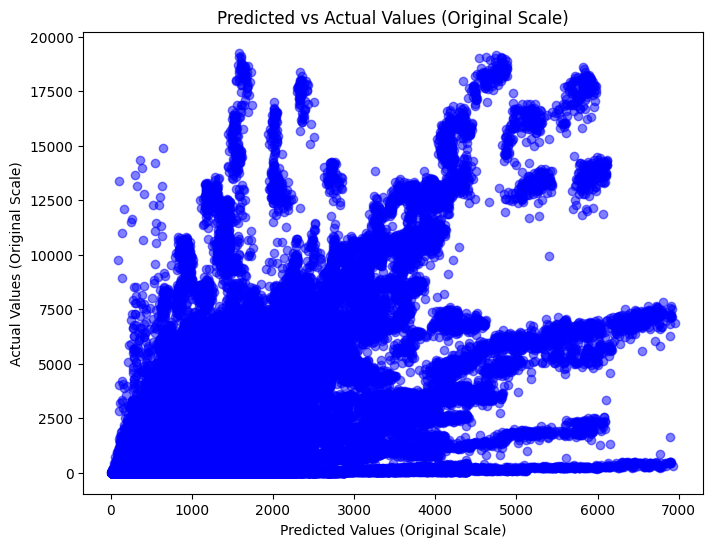

In [39]:
import numpy as np

import matplotlib.pyplot as plt

# log1p 변환된 값을 원래 값으로 되돌리기
y_2023_original = np.expm1(y_2023_tensor.cpu().numpy())
predictions_original = np.expm1(predictions.cpu().numpy())

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.scatter(predictions_original, y_2023_original, alpha=0.5, c='blue')
plt.xlabel('Predicted Values (Original Scale)')
plt.ylabel('Actual Values (Original Scale)')
plt.title('Predicted vs Actual Values (Original Scale)')
plt.show()

### 2차 테스트

In [31]:
class MLPWithEmbedding3(nn.Module):
    def __init__(self, num_stations, embedding_dim, input_size):
        super(MLPWithEmbedding3, self).__init__()
        # 역번호에 대한 임베딩 레이어
        self.embedding = nn.Embedding(num_stations, embedding_dim)
        
        # 임베딩 레이어와 다른 연속형 피처를 결합한 후 MLP를 구성
        self.fc1 = nn.Linear(embedding_dim + input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x_numeric, x_station):
        # 역번호 임베딩 처리
        x_station_embedded = self.embedding(x_station)
        x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
        
        # 임베딩된 역번호와 연속형 피처 결합
        x = torch.cat([x_numeric, x_station_embedded], dim=1)
        
        # MLP 모델 진행
        x = self.fc1(x)
        x = self.relu(x)
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        
        x = self.fc3(x)
        return x

In [32]:
# 모델 초기화
num_stations = 2829  # 예시로 100개의 역번호가 있다고 가정
embedding_dim = 8  # 임베딩 벡터의 차원
input_size = 10  # 연속형 피처 수 (예시)

model = MLPWithEmbedding3(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()  # 회귀 문제이므로 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('cuda:0' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

# 모델을 평가 모드로 전환
model.eval()

# 저장된 모델 가중치 로드
model.load_state_dict(torch.load('model_weights_3.pth',weights_only=True))

# 예측 수행
with torch.no_grad():
	X_2023_tensor = X_2023_tensor.to(device)
	X_station_2023_tensor = X_station_2023_tensor.to(device)
	y_2023_tensor = y_2023_tensor.to(device)
	
	predictions = model(X_2023_tensor, X_station_2023_tensor)
	metrics = evaluate_predictions(y_2023_tensor, predictions)
	print(metrics)

{'MSE': 0.90246826, 'MAE': 0.58134913, 'R²': 0.4647586884095145}


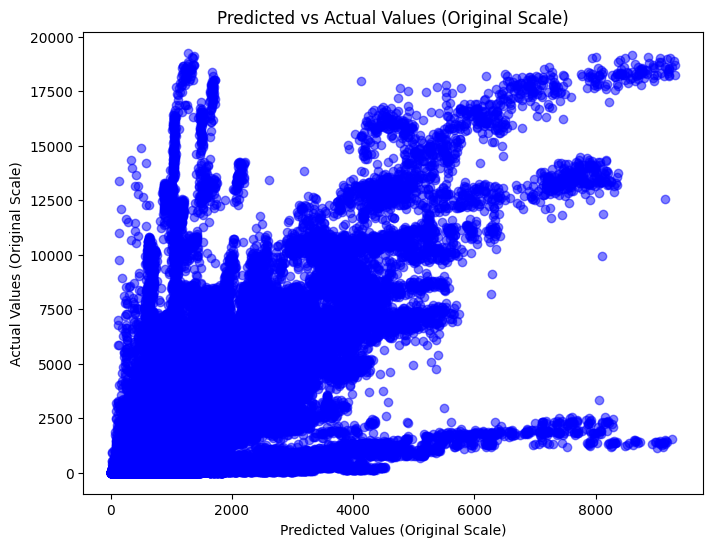

In [33]:
import numpy as np

import matplotlib.pyplot as plt

# log1p 변환된 값을 원래 값으로 되돌리기
y_2023_original = np.expm1(y_2023_tensor.cpu().numpy())
predictions_original = np.expm1(predictions.cpu().numpy())

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.scatter(predictions_original, y_2023_original, alpha=0.5, c='blue')
plt.xlabel('Predicted Values (Original Scale)')
plt.ylabel('Actual Values (Original Scale)')
plt.title('Predicted vs Actual Values (Original Scale)')
plt.show()

### 3차 테스트

In [25]:
class MLPWithEmbedding4(nn.Module):
    def __init__(self, num_stations, embedding_dim, input_size):
        super(MLPWithEmbedding4, self).__init__()
        # 역번호에 대한 임베딩 레이어
        self.embedding = nn.Embedding(num_stations, embedding_dim)
        
        # 임베딩 레이어와 다른 연속형 피처를 결합한 후 MLP를 구성
        self.fc1 = nn.Linear(embedding_dim + input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batch_norm1 = nn.BatchNorm1d(64)
        self.batch_norm2 = nn.BatchNorm1d(32)
    
    def forward(self, x_numeric, x_station):
        # 역번호 임베딩 처리
        x_station_embedded = self.embedding(x_station)
        x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
        
        # 임베딩된 역번호와 연속형 피처 결합
        x = torch.cat([x_numeric, x_station_embedded], dim=1)
        
        # MLP 모델 진행
        x = self.fc1(x)
        x = self.batch_norm1(x)
        x = self.relu(x)
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.batch_norm2(x)
        x = self.relu(x)
        
        x = self.fc3(x)
        return x

In [30]:
# 모델 초기화
num_stations = 2829  # 예시로 100개의 역번호가 있다고 가정
embedding_dim = 8  # 임베딩 벡터의 차원
input_size = 10  # 연속형 피처 수 (예시)

model = MLPWithEmbedding4(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()  # 회귀 문제이므로 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('cuda:0' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

# 모델을 평가 모드로 전환
model.eval()

# 저장된 모델 가중치 로드
model.load_state_dict(torch.load('model_weights_4.pth',weights_only=True))

# 예측 수행
with torch.no_grad():
	X_2023_tensor = X_2023_tensor.to(device)
	X_station_2023_tensor = X_station_2023_tensor.to(device)
	y_2023_tensor = y_2023_tensor.to(device)
	
	predictions = model(X_2023_tensor, X_station_2023_tensor)
	metrics = evaluate_predictions(y_2023_tensor, predictions)
	print(metrics)

{'MSE': 0.9633934, 'MAE': 0.65980357, 'R²': 0.42862479327105163}
Mean Squared Error on 2023 data: 0.9634


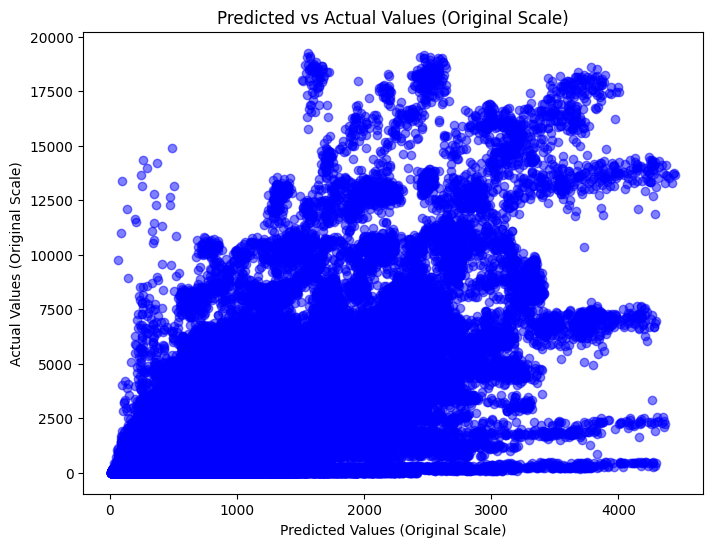

In [28]:
import numpy as np

import matplotlib.pyplot as plt

# log1p 변환된 값을 원래 값으로 되돌리기
y_2023_original = np.expm1(y_2023_tensor.cpu().numpy())
predictions_original = np.expm1(predictions.cpu().numpy())

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.scatter(predictions_original, y_2023_original, alpha=0.5, c='blue')
plt.xlabel('Predicted Values (Original Scale)')
plt.ylabel('Actual Values (Original Scale)')
plt.title('Predicted vs Actual Values (Original Scale)')
plt.show()

### 4차 테스트(5번)

In [49]:
class MLPWithEmbedding5(nn.Module):
    def __init__(self, num_stations, embedding_dim, input_size):
        super(MLPWithEmbedding5, self).__init__()
        # 역번호에 대한 임베딩 레이어
        self.embedding = nn.Embedding(num_stations, embedding_dim)
        
        # 임베딩 레이어와 다른 연속형 피처를 결합한 후 MLP를 구성
        self.fc1 = nn.Linear(embedding_dim + input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.fc5 = nn.Linear(16, 1)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3)
        self.batch_norm1 = nn.BatchNorm1d(128)
        self.batch_norm2 = nn.BatchNorm1d(64)
        self.batch_norm3 = nn.BatchNorm1d(32)
        self.batch_norm4 = nn.BatchNorm1d(16)
    
    def forward(self, x_numeric, x_station):
        # 역번호 임베딩 처리
        x_station_embedded = self.embedding(x_station)
        x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
        
        # 임베딩된 역번호와 연속형 피처 결합
        x = torch.cat([x_numeric, x_station_embedded], dim=1)
        
        # MLP 모델 진행
        x = self.fc1(x)
        x = self.batch_norm1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.batch_norm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.fc3(x)
        x = self.batch_norm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.fc4(x)
        x = self.batch_norm4(x)
        x = self.relu(x)
        
        x = self.fc5(x)
        return x

In [50]:
# 모델 초기화
num_stations = 2829  # 예시로 100개의 역번호가 있다고 가정
embedding_dim = 8  # 임베딩 벡터의 차원
input_size = 10  # 연속형 피처 수 (예시)

model = MLPWithEmbedding5(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()  # 회귀 문제이므로 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('cuda:0' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

# 모델을 평가 모드로 전환
model.eval()

# 저장된 모델 가중치 로드
model.load_state_dict(torch.load('model_weights_5.pth',weights_only=True))

# 예측 수행
with torch.no_grad():
	X_2023_tensor = X_2023_tensor.to(device)
	X_station_2023_tensor = X_station_2023_tensor.to(device)
	y_2023_tensor = y_2023_tensor.to(device)
	
	predictions = model(X_2023_tensor, X_station_2023_tensor)
	metrics = evaluate_predictions(y_2023_tensor, predictions)
	print(metrics)

{'MSE': 1.000804, 'MAE': 0.5958221, 'R²': 0.40643687904144277}


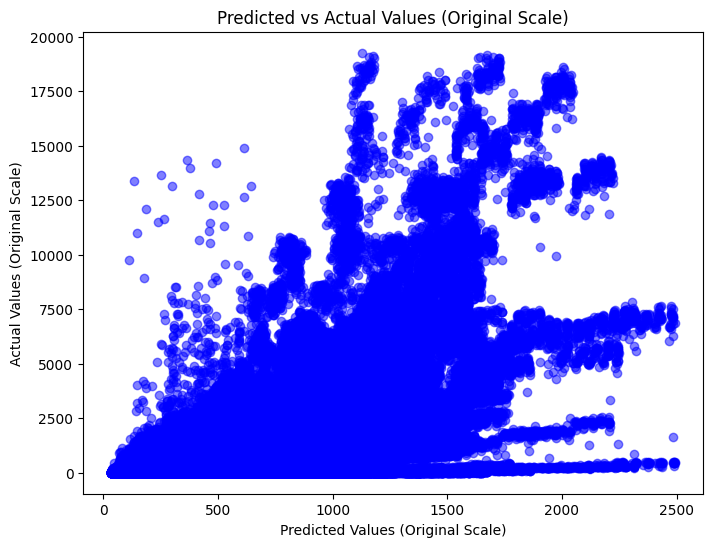

In [51]:
import numpy as np

import matplotlib.pyplot as plt

# log1p 변환된 값을 원래 값으로 되돌리기
y_2023_original = np.expm1(y_2023_tensor.cpu().numpy())
predictions_original = np.expm1(predictions.cpu().numpy())

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.scatter(predictions_original, y_2023_original, alpha=0.5, c='blue')
plt.xlabel('Predicted Values (Original Scale)')
plt.ylabel('Actual Values (Original Scale)')
plt.title('Predicted vs Actual Values (Original Scale)')
plt.show()

### 5차 테스트(6번)

In [52]:
class MLPWithEmbedding3(nn.Module):
    def __init__(self, num_stations, embedding_dim, input_size):
        super(MLPWithEmbedding3, self).__init__()
        # 역번호에 대한 임베딩 레이어
        self.embedding = nn.Embedding(num_stations, embedding_dim)
        
        # 임베딩 레이어와 다른 연속형 피처를 결합한 후 MLP를 구성
        self.fc1 = nn.Linear(embedding_dim + input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x_numeric, x_station):
        # 역번호 임베딩 처리
        x_station_embedded = self.embedding(x_station)
        x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
        
        # 임베딩된 역번호와 연속형 피처 결합
        x = torch.cat([x_numeric, x_station_embedded], dim=1)
        
        # MLP 모델 진행
        x = self.fc1(x)
        x = self.relu(x)
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        
        x = self.fc3(x)
        return x

In [53]:
# 모델 초기화
num_stations = 2829  # 예시로 100개의 역번호가 있다고 가정
embedding_dim = 8  # 임베딩 벡터의 차원
input_size = 10  # 연속형 피처 수 (예시)

model = MLPWithEmbedding3(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()  # 회귀 문제이므로 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('cuda:0' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

# 모델을 평가 모드로 전환
model.eval()

# 저장된 모델 가중치 로드
model.load_state_dict(torch.load('model_weights_6.pth',weights_only=True))

# 예측 수행
with torch.no_grad():
	X_2023_tensor = X_2023_tensor.to(device)
	X_station_2023_tensor = X_station_2023_tensor.to(device)
	y_2023_tensor = y_2023_tensor.to(device)
	
	predictions = model(X_2023_tensor, X_station_2023_tensor)
	metrics = evaluate_predictions(y_2023_tensor, predictions)
	print(metrics)

{'MSE': 0.7612117, 'MAE': 0.44930926, 'R²': 0.5485358328016379}


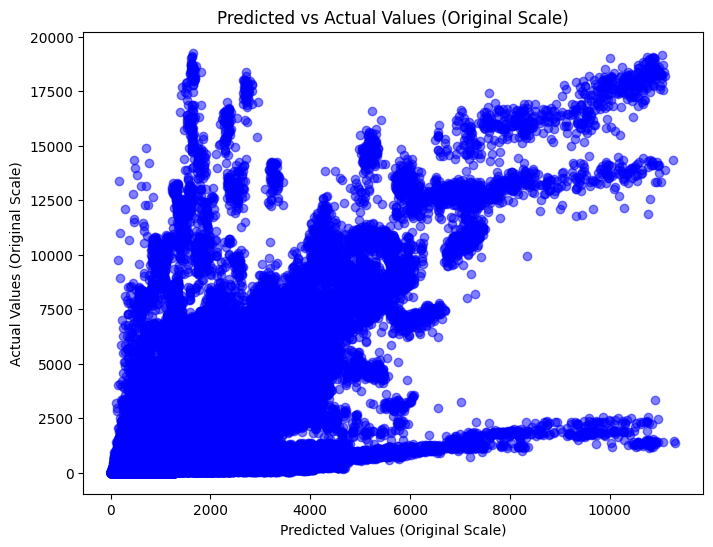

In [54]:
import numpy as np

import matplotlib.pyplot as plt

# log1p 변환된 값을 원래 값으로 되돌리기
y_2023_original = np.expm1(y_2023_tensor.cpu().numpy())
predictions_original = np.expm1(predictions.cpu().numpy())

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.scatter(predictions_original, y_2023_original, alpha=0.5, c='blue')
plt.xlabel('Predicted Values (Original Scale)')
plt.ylabel('Actual Values (Original Scale)')
plt.title('Predicted vs Actual Values (Original Scale)')
plt.show()

In [22]:
evaluate_predictions(y_2023_original, predictions_original)

{'MSE': 673069.25, 'MAE': 378.74478, 'R²': 0.4952636780843007}

### 6차 테스트(7번)

In [16]:
class MLPWithEmbedding3(nn.Module):
    def __init__(self, num_stations, embedding_dim, input_size):
        super(MLPWithEmbedding3, self).__init__()
        # 역번호에 대한 임베딩 레이어
        self.embedding = nn.Embedding(num_stations, embedding_dim)
        
        # 임베딩 레이어와 다른 연속형 피처를 결합한 후 MLP를 구성
        self.fc1 = nn.Linear(embedding_dim + input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x_numeric, x_station):
        # 역번호 임베딩 처리
        x_station_embedded = self.embedding(x_station)
        x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
        
        # 임베딩된 역번호와 연속형 피처 결합
        x = torch.cat([x_numeric, x_station_embedded], dim=1)
        
        # MLP 모델 진행
        x = self.fc1(x)
        x = self.relu(x)
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        
        x = self.fc3(x)
        return x

In [20]:
# 모델 초기화
num_stations = 2829  # 예시로 100개의 역번호가 있다고 가정
embedding_dim = 8  # 임베딩 벡터의 차원
input_size = 10  # 연속형 피처 수 (예시)

model = MLPWithEmbedding3(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()  # 회귀 문제이므로 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('cuda:0' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

# 모델을 평가 모드로 전환
model.eval()

# 저장된 모델 가중치 로드
model.load_state_dict(torch.load('model_weights_7.pth',weights_only=True))

# 예측 수행
with torch.no_grad():
	X_2023_tensor = X_2023_tensor.to(device)
	X_station_2023_tensor = X_station_2023_tensor.to(device)
	y_2023_tensor = y_2023_tensor.to(device)
	
	predictions = model(X_2023_tensor, X_station_2023_tensor)
	metrics = evaluate_predictions(y_2023_tensor, predictions)
	print(metrics)

{'MSE': 0.80352145, 'MAE': 0.5385364, 'R²': 0.5234424585474704}


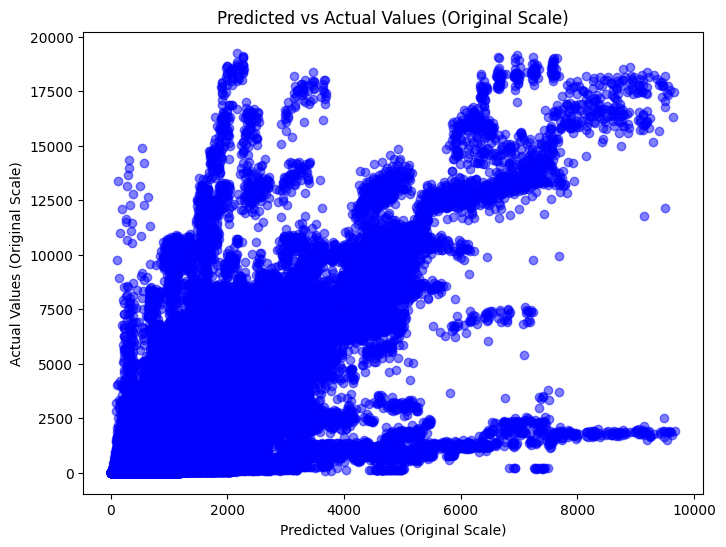

In [21]:
import numpy as np

import matplotlib.pyplot as plt

# log1p 변환된 값을 원래 값으로 되돌리기
y_2023_original = np.expm1(y_2023_tensor.cpu().numpy())
predictions_original = np.expm1(predictions.cpu().numpy())

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.scatter(predictions_original, y_2023_original, alpha=0.5, c='blue')
plt.xlabel('Predicted Values (Original Scale)')
plt.ylabel('Actual Values (Original Scale)')
plt.title('Predicted vs Actual Values (Original Scale)')
plt.show()

## 딥러닝 모델학습 2

In [33]:
class MLPWithEmbedding3(nn.Module):
    def __init__(self, num_stations, embedding_dim, input_size):
        super(MLPWithEmbedding3, self).__init__()
        # 역번호에 대한 임베딩 레이어
        self.embedding = nn.Embedding(num_stations, embedding_dim)
        
        # 임베딩 레이어와 다른 연속형 피처를 결합한 후 MLP를 구성
        self.fc1 = nn.Linear(embedding_dim + input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x_numeric, x_station):
        # 역번호 임베딩 처리
        x_station_embedded = self.embedding(x_station)
        x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
        
        # 임베딩된 역번호와 연속형 피처 결합
        x = torch.cat([x_numeric, x_station_embedded], dim=1)
        
        # MLP 모델 진행
        x = self.fc1(x)
        x = self.relu(x)
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        
        x = self.fc3(x)
        return x

In [34]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

num_stations = np.max(X_station_train) + 1

# 모델 초기화
embedding_dim = 8  # 임베딩 벡터의 차원
input_size = X_train.shape[1]  # 연속형 피처 수
model = MLPWithEmbedding3(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()  # 회귀 문제이므로 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('mps' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

# 학습 및 검증
num_epochs = 200
train_losses = []
val_losses = []

y_train_tensor = y_train_tensor.view(-1, 1)
y_val_tensor = y_val_tensor.view(-1, 1)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for inputs_numeric, inputs_station, targets in train_loader:
        inputs_numeric = inputs_numeric.to(device)
        inputs_station = inputs_station.to(device)
        targets = targets.to(device).view(-1, 1)  # 타겟 텐서 크기 변환
        
        optimizer.zero_grad()
        outputs = model(inputs_numeric, inputs_station)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs_numeric.size(0)
    
    train_loss = running_loss / len(train_loader.dataset)
    
    # TensorBoard에 학습 손실 기록
    writer.add_scalar('Training Loss', train_loss, epoch)

    # 검증
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs_numeric, inputs_station, targets in val_loader:
            inputs_numeric = inputs_numeric.to(device)
            inputs_station = inputs_station.to(device)
            targets = targets.to(device).view(-1, 1)  # 타겟 텐서 크기 변환
            
            outputs = model(inputs_numeric, inputs_station)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs_numeric.size(0)
    
    val_loss = val_loss / len(val_loader.dataset)
    
    # TensorBoard에 검증 손실 기록
    writer.add_scalar('Validation Loss', val_loss, epoch)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# 학습이 끝난 후 TensorBoard 기록 종료
writer.close()

Epoch [1/200], Train Loss: 0.2879, Validation Loss: 0.1904
Epoch [2/200], Train Loss: 0.1492, Validation Loss: 0.1523
Epoch [3/200], Train Loss: 0.1226, Validation Loss: 0.1232
Epoch [4/200], Train Loss: 0.1138, Validation Loss: 0.1570
Epoch [5/200], Train Loss: 0.1067, Validation Loss: 0.1130
Epoch [6/200], Train Loss: 0.1032, Validation Loss: 0.1320
Epoch [7/200], Train Loss: 0.0999, Validation Loss: 0.1334
Epoch [8/200], Train Loss: 0.0966, Validation Loss: 0.1271
Epoch [9/200], Train Loss: 0.0944, Validation Loss: 0.1234
Epoch [10/200], Train Loss: 0.0931, Validation Loss: 0.1097
Epoch [11/200], Train Loss: 0.0923, Validation Loss: 0.1116
Epoch [12/200], Train Loss: 0.0909, Validation Loss: 0.1137
Epoch [13/200], Train Loss: 0.0902, Validation Loss: 0.1180
Epoch [14/200], Train Loss: 0.0897, Validation Loss: 0.1184
Epoch [15/200], Train Loss: 0.0893, Validation Loss: 0.1320
Epoch [16/200], Train Loss: 0.0888, Validation Loss: 0.1263
Epoch [17/200], Train Loss: 0.0884, Validation Lo

In [35]:
torch.save(model.state_dict(),'model2_weights_1.pth')

## 모델 테스트 2

In [36]:
df_2023 = pd.read_csv('data/learningdata2/testdata_2023.csv', encoding='utf-8')
adjust_df_2023 = adjustDf(df_2023)
X_2023 = (adjust_df_2023.drop(['하차인원', '역번호'], axis=1)).values
X_station_2023 = (adjust_df_2023[['역번호']]).values
y_2023 = (adjust_df_2023['하차인원']).values

X_2023_tensor = torch.FloatTensor(X_2023)
X_station_2023_tensor = torch.LongTensor(X_station_2023)
y_2023_tensor = torch.FloatTensor(y_2023).view(-1, 1)

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_predictions(y_true, y_pred):
    # dict: MSE, MAE, R² 스코어를 포함한 성능 지표
    if isinstance(y_true, torch.Tensor):
        y_true = y_true.cpu().numpy()
    if isinstance(y_pred, torch.Tensor):
        y_pred = y_pred.cpu().numpy()
    
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return {
        'MSE': mse,
        'MAE': mae,
        'R²': r2
    }

### 1차 테스트

In [38]:
class MLPWithEmbedding3(nn.Module):
    def __init__(self, num_stations, embedding_dim, input_size):
        super(MLPWithEmbedding3, self).__init__()
        # 역번호에 대한 임베딩 레이어
        self.embedding = nn.Embedding(num_stations, embedding_dim)
        
        # 임베딩 레이어와 다른 연속형 피처를 결합한 후 MLP를 구성
        self.fc1 = nn.Linear(embedding_dim + input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x_numeric, x_station):
        # 역번호 임베딩 처리
        x_station_embedded = self.embedding(x_station)
        x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
        
        # 임베딩된 역번호와 연속형 피처 결합
        x = torch.cat([x_numeric, x_station_embedded], dim=1)
        
        # MLP 모델 진행
        x = self.fc1(x)
        x = self.relu(x)
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        
        x = self.fc3(x)
        return x

In [39]:
# 모델 초기화
num_stations = 2829  # 예시로 100개의 역번호가 있다고 가정
embedding_dim = 8  # 임베딩 벡터의 차원
input_size = 11  # 연속형 피처 수 (예시)

model = MLPWithEmbedding3(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()  # 회귀 문제이므로 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('cuda:0' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

# 모델을 평가 모드로 전환
model.eval()

# 저장된 모델 가중치 로드
model.load_state_dict(torch.load('model2_weights_1.pth',weights_only=True))

# 예측 수행
with torch.no_grad():
	X_2023_tensor = X_2023_tensor.to(device)
	X_station_2023_tensor = X_station_2023_tensor.to(device)
	y_2023_tensor = y_2023_tensor.to(device)
	
	predictions = model(X_2023_tensor, X_station_2023_tensor)
	metrics = evaluate_predictions(y_2023_tensor, predictions)
	print(metrics)

{'MSE': 0.92199147, 'MAE': 0.6296745, 'R²': 0.4531793772229772}


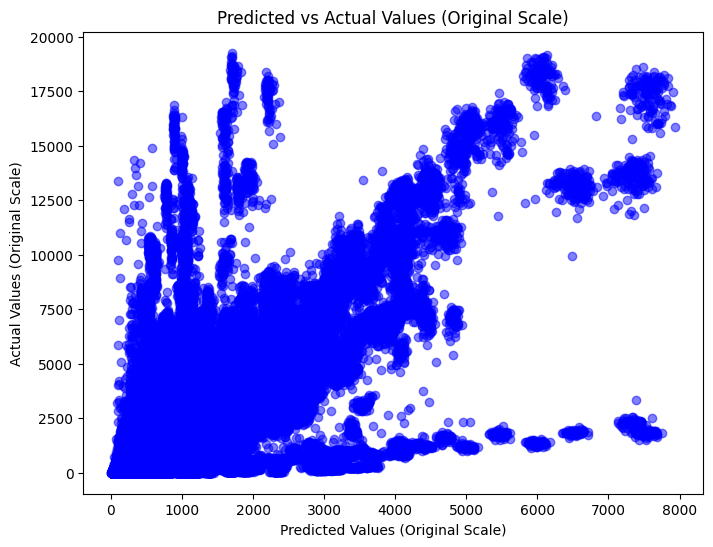

In [40]:
import numpy as np

import matplotlib.pyplot as plt

# log1p 변환된 값을 원래 값으로 되돌리기
y_2023_original = np.expm1(y_2023_tensor.cpu().numpy())
predictions_original = np.expm1(predictions.cpu().numpy())

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.scatter(predictions_original, y_2023_original, alpha=0.5, c='blue')
plt.xlabel('Predicted Values (Original Scale)')
plt.ylabel('Actual Values (Original Scale)')
plt.title('Predicted vs Actual Values (Original Scale)')
plt.show()

## 딥러닝 모델학습 3

In [12]:
class MLPWithEmbedding3(nn.Module):
    def __init__(self, num_stations, embedding_dim, input_size):
        super(MLPWithEmbedding3, self).__init__()
        # 역번호에 대한 임베딩 레이어
        self.embedding = nn.Embedding(num_stations, embedding_dim)
        
        # 임베딩 레이어와 다른 연속형 피처를 결합한 후 MLP를 구성
        self.fc1 = nn.Linear(embedding_dim + input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x_numeric, x_station):
        # 역번호 임베딩 처리
        x_station_embedded = self.embedding(x_station)
        x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
        
        # 임베딩된 역번호와 연속형 피처 결합
        x = torch.cat([x_numeric, x_station_embedded], dim=1)
        
        # MLP 모델 진행
        x = self.fc1(x)
        x = self.relu(x)
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        
        x = self.fc3(x)
        return x

In [13]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

num_stations = np.max(X_station_train) + 1

# 모델 초기화
embedding_dim = 8  # 임베딩 벡터의 차원
input_size = X_train.shape[1]  # 연속형 피처 수
model = MLPWithEmbedding3(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()  # 회귀 문제이므로 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('mps' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

# 학습 및 검증
num_epochs = 200
train_losses = []
val_losses = []

y_train_tensor = y_train_tensor.view(-1, 1)
y_val_tensor = y_val_tensor.view(-1, 1)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for inputs_numeric, inputs_station, targets in train_loader:
        inputs_numeric = inputs_numeric.to(device)
        inputs_station = inputs_station.to(device)
        targets = targets.to(device).view(-1, 1)  # 타겟 텐서 크기 변환
        
        optimizer.zero_grad()
        outputs = model(inputs_numeric, inputs_station)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs_numeric.size(0)
    
    train_loss = running_loss / len(train_loader.dataset)
    
    # TensorBoard에 학습 손실 기록
    writer.add_scalar('Training Loss', train_loss, epoch)

    # 검증
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs_numeric, inputs_station, targets in val_loader:
            inputs_numeric = inputs_numeric.to(device)
            inputs_station = inputs_station.to(device)
            targets = targets.to(device).view(-1, 1)  # 타겟 텐서 크기 변환
            
            outputs = model(inputs_numeric, inputs_station)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs_numeric.size(0)
    
    val_loss = val_loss / len(val_loader.dataset)
    
    # TensorBoard에 검증 손실 기록
    writer.add_scalar('Validation Loss', val_loss, epoch)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# 학습이 끝난 후 TensorBoard 기록 종료
writer.close()

Epoch [1/200], Train Loss: 0.4868, Validation Loss: 0.2720
Epoch [2/200], Train Loss: 0.1518, Validation Loss: 0.2232
Epoch [3/200], Train Loss: 0.1224, Validation Loss: 0.1786
Epoch [4/200], Train Loss: 0.1088, Validation Loss: 0.1861
Epoch [5/200], Train Loss: 0.1056, Validation Loss: 0.1435
Epoch [6/200], Train Loss: 0.1028, Validation Loss: 0.1796
Epoch [7/200], Train Loss: 0.1003, Validation Loss: 0.1213
Epoch [8/200], Train Loss: 0.0971, Validation Loss: 0.0907
Epoch [9/200], Train Loss: 0.0947, Validation Loss: 0.1254
Epoch [10/200], Train Loss: 0.0923, Validation Loss: 0.1329
Epoch [11/200], Train Loss: 0.0911, Validation Loss: 0.0889
Epoch [12/200], Train Loss: 0.0904, Validation Loss: 0.1119
Epoch [13/200], Train Loss: 0.0895, Validation Loss: 0.1326
Epoch [14/200], Train Loss: 0.0884, Validation Loss: 0.1203
Epoch [15/200], Train Loss: 0.0878, Validation Loss: 0.1504
Epoch [16/200], Train Loss: 0.0869, Validation Loss: 0.1011
Epoch [17/200], Train Loss: 0.0857, Validation Lo

In [14]:
torch.save(model.state_dict(),'model_line_7_weights_1.pth')

## 모델 테스트 3

In [15]:
df_2023 = pd.read_csv('data/learningdata2/testdata_2023.csv', encoding='utf-8')
adjust_df_2023 = adjustDf(df_2023)
X_2023 = (adjust_df_2023.drop(['하차인원', '역번호'], axis=1)).values
X_station_2023 = (adjust_df_2023[['역번호']]).values
y_2023 = (adjust_df_2023['하차인원']).values

X_2023_tensor = torch.FloatTensor(X_2023)
X_station_2023_tensor = torch.LongTensor(X_station_2023)
y_2023_tensor = torch.FloatTensor(y_2023).view(-1, 1)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_predictions(y_true, y_pred):
    # dict: MSE, MAE, R² 스코어를 포함한 성능 지표
    if isinstance(y_true, torch.Tensor):
        y_true = y_true.cpu().numpy()
    if isinstance(y_pred, torch.Tensor):
        y_pred = y_pred.cpu().numpy()
    
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return {
        'MSE': mse,
        'MAE': mae,
        'R²': r2
    }

In [17]:
class MLPWithEmbedding3(nn.Module):
    def __init__(self, num_stations, embedding_dim, input_size):
        super(MLPWithEmbedding3, self).__init__()
        # 역번호에 대한 임베딩 레이어
        self.embedding = nn.Embedding(num_stations, embedding_dim)
        
        # 임베딩 레이어와 다른 연속형 피처를 결합한 후 MLP를 구성
        self.fc1 = nn.Linear(embedding_dim + input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x_numeric, x_station):
        # 역번호 임베딩 처리
        x_station_embedded = self.embedding(x_station)
        x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
        
        # 임베딩된 역번호와 연속형 피처 결합
        x = torch.cat([x_numeric, x_station_embedded], dim=1)
        
        # MLP 모델 진행
        x = self.fc1(x)
        x = self.relu(x)
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        
        x = self.fc3(x)
        return x

In [20]:
# 모델 초기화
num_stations = np.max(X_station_train) + 1  # 예시로 100개의 역번호가 있다고 가정
embedding_dim = 8  # 임베딩 벡터의 차원
input_size = 10  # 연속형 피처 수 (예시)

model = MLPWithEmbedding3(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()  # 회귀 문제이므로 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('cuda:0' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

# 모델을 평가 모드로 전환
model.eval()

# 저장된 모델 가중치 로드
model.load_state_dict(torch.load('model_line_7_weights_1.pth',weights_only=True))

# 예측 수행
with torch.no_grad():
	X_2023_tensor = X_2023_tensor.to(device)
	X_station_2023_tensor = X_station_2023_tensor.to(device)
	y_2023_tensor = y_2023_tensor.to(device)
	
	predictions = model(X_2023_tensor, X_station_2023_tensor)
	metrics = evaluate_predictions(y_2023_tensor, predictions)
	print(metrics)

{'MSE': 0.74172425, 'MAE': 0.46250963, 'R²': 0.4655671983179648}


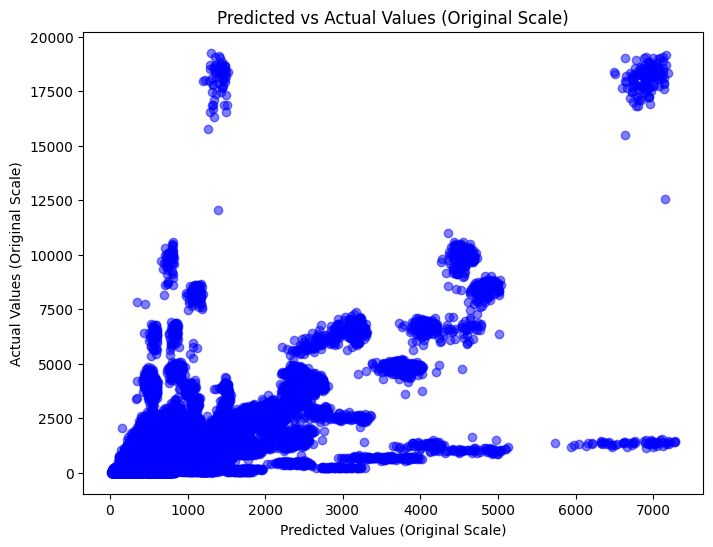

In [21]:
import numpy as np

import matplotlib.pyplot as plt

# log1p 변환된 값을 원래 값으로 되돌리기
y_2023_original = np.expm1(y_2023_tensor.cpu().numpy())
predictions_original = np.expm1(predictions.cpu().numpy())

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.scatter(predictions_original, y_2023_original, alpha=0.5, c='blue')
plt.xlabel('Predicted Values (Original Scale)')
plt.ylabel('Actual Values (Original Scale)')
plt.title('Predicted vs Actual Values (Original Scale)')
plt.show()

In [22]:
evaluate_predictions(y_2023_original, predictions_original)

{'MSE': 439696.94, 'MAE': 269.38022, 'R²': 0.4787423427484032}

# 하차인원 범주화 해서 학습

In [3]:
import pandas as pd
import numpy as np
import pickle

# df_2023 = pd.read_csv('data/learningdata2/testdata_2023.csv',encoding='utf-8')

df_2022 = pd.read_csv('data/learningdata2/testdata_2022.csv',encoding='utf-8')
df_2021 = pd.read_csv('data/learningdata2/testdata_2021.csv',encoding='utf-8')

In [4]:
df_2022.head(10)

,일시,호선,역번호,역명,주말,요일,통과호선수,미세먼지(pm10),시간,하차인원,공휴일여부,강수량(mm),평균기온,최저기온,최고기온
0,2022-01-01,1,150,서울역,1,5,4,29.0,6,560,1,0.0,-4.3,-10.2,2.3
1,2022-01-01,1,151,시청,1,5,2,29.0,6,195,1,0.0,-4.3,-10.2,2.3
2,2022-01-01,1,152,종각,1,5,1,28.0,6,136,1,0.0,-4.3,-10.2,2.3
3,2022-01-01,1,153,종로3가,1,5,3,28.0,6,139,1,0.0,-4.3,-10.2,2.3
4,2022-01-01,1,154,종로5가,1,5,1,28.0,6,80,1,0.0,-4.3,-10.2,2.3
5,2022-01-01,1,155,동대문,1,5,2,28.0,6,59,1,0.0,-4.3,-10.2,2.3
6,2022-01-01,1,156,신설동,1,5,3,29.0,6,84,1,0.0,-4.3,-10.2,2.3
7,2022-01-01,1,157,제기동,1,5,1,29.0,6,82,1,0.0,-4.3,-10.2,2.3
8,2022-01-01,1,158,청량리(서울시립대입구),1,5,1,29.0,6,129,1,0.0,-4.3,-10.2,2.3
9,2022-01-01,1,159,동묘앞,1,5,2,28.0,6,77,1,0.0,-4.3,-10.2,2.3


## 데이터 전처리

In [5]:
def adjustDf(temp_df):
    return_df = temp_df[['역번호','주말','요일','통과호선수','미세먼지(pm10)','시간','하차인원','공휴일여부','강수량(mm)','최저기온','평균기온','최고기온']]
    # 결측치 제거
    return_df = return_df.dropna()
    # 시간 23시 제거
    return_df = return_df[return_df['시간'] != 23]
    # 하차인원 로그변환
    return_df['하차인원'] = return_df['하차인원'].apply(np.log1p)
    # 하차인원 단계별로 변환
    return_df['하차인원'] = pd.qcut(return_df['하차인원'], 5, labels=[1, 2, 3, 4, 5])
    # Scaler
    columns_to_scale = ['미세먼지(pm10)', '평균기온', '최저기온', '최고기온', '강수량(mm)']
    with open('scaler.pkl', 'rb') as f:
        loaded_scaler = pickle.load(f)
    return_df[columns_to_scale] = loaded_scaler.transform(return_df[columns_to_scale])
    return return_df

In [6]:
adjust_df_2021 = adjustDf(df_2021)
adjust_df_2022 = adjustDf(df_2022)

In [7]:
train_df = pd.concat([adjust_df_2021,adjust_df_2022], ignore_index=True)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424735 entries, 0 to 3424734
Data columns (total 12 columns):
 #   Column      Dtype   
---  ------      -----   
 0   역번호         int64   
 1   주말          int64   
 2   요일          int64   
 3   통과호선수       int64   
 4   미세먼지(pm10)  float64 
 5   시간          int64   
 6   하차인원        category
 7   공휴일여부       int64   
 8   강수량(mm)     float64 
 9   최저기온        float64 
 10  평균기온        float64 
 11  최고기온        float64 
dtypes: category(1), float64(5), int64(6)
memory usage: 290.7 MB


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3060 Ti'

In [10]:
X = (train_df.drop(['하차인원', '역번호'], axis=1)).values
X_station = (train_df[['역번호']]).values
y = (train_df[['하차인원']]).values

X_train, X_val, X_station_train, X_station_val, y_train, y_val = train_test_split(X, X_station, y, test_size=0.1, random_state=42)

print(X_train.shape, X_val.shape, X_station_train.shape, X_station_val.shape, y_train.shape, y_val.shape)

(3082261, 10) (342474, 10) (3082261, 1) (342474, 1) (3082261, 1) (342474, 1)


In [11]:
# PyTorch 텐서로 변환
X_train_tensor = torch.FloatTensor(X_train)
X_station_train_tensor = torch.LongTensor(X_station_train)  # 역번호는 범주형이므로 LongTensor로 변환
y_train_tensor = torch.LongTensor(y_train)  # 범주형이므로 LongTensor로 변환

X_val_tensor = torch.FloatTensor(X_val)
X_station_val_tensor = torch.LongTensor(X_station_val)
y_val_tensor = torch.LongTensor(y_val)  # 범주형이므로 LongTensor로 변환

# 데이터셋 및 데이터로더 구성
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, X_station_train_tensor, y_train_tensor)
val_dataset = torch.utils.data.TensorDataset(X_val_tensor, X_station_val_tensor, y_val_tensor)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32)

## 모델 학습 1

In [10]:
class MLPWithEmbedding3(nn.Module):
    def __init__(self, num_stations, embedding_dim, input_size):
        super(MLPWithEmbedding3, self).__init__()
        # 역번호에 대한 임베딩 레이어
        self.embedding = nn.Embedding(num_stations, embedding_dim)
        
        # 임베딩 레이어와 다른 연속형 피처를 결합한 후 MLP를 구성
        self.fc1 = nn.Linear(embedding_dim + input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 5)  # 출력층을 5개의 뉴런으로 변경
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x_numeric, x_station):
        # 역번호 임베딩 처리
        x_station_embedded = self.embedding(x_station)
        x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
        
        # 임베딩된 역번호와 연속형 피처 결합
        x = torch.cat([x_numeric, x_station_embedded], dim=1)
        
        # MLP 모델 진행
        x = self.fc1(x)
        x = self.relu(x)
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        
        x = self.fc3(x)
        return x

In [14]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

num_stations = np.max(X_station_train) + 1

# 모델 초기화
embedding_dim = 8  # 임베딩 벡터의 차원
input_size = X_train.shape[1]  # 연속형 피처 수
model = MLPWithEmbedding3(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()  # 분류 문제이므로 CrossEntropyLoss 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('cuda:0' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

# 학습 및 검증
num_epochs = 200
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for inputs_numeric, inputs_station, targets in train_loader:
        inputs_numeric = inputs_numeric.to(device)
        inputs_station = inputs_station.to(device)
        targets = (targets - 1).to(device).view(-1)  # 타겟 텐서 크기 변환 및 0부터 시작하도록 조정
        
        optimizer.zero_grad()
        outputs = model(inputs_numeric, inputs_station)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs_numeric.size(0)
    
    train_loss = running_loss / len(train_loader.dataset)
    
    # TensorBoard에 학습 손실 기록
    writer.add_scalar('Training Loss', train_loss, epoch)

    # 검증
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs_numeric, inputs_station, targets in val_loader:
            inputs_numeric = inputs_numeric.to(device)
            inputs_station = inputs_station.to(device)
            targets = (targets - 1).to(device).view(-1)
            
            outputs = model(inputs_numeric, inputs_station)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs_numeric.size(0)
    
    val_loss = val_loss / len(val_loader.dataset)
    
    # TensorBoard에 검증 손실 기록
    writer.add_scalar('Validation Loss', val_loss, epoch)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# 학습이 끝난 후 TensorBoard 기록 종료
writer.close()

Epoch [1/200], Train Loss: 0.8545, Validation Loss: 0.6643
Epoch [2/200], Train Loss: 0.7142, Validation Loss: 0.6341
Epoch [3/200], Train Loss: 0.6786, Validation Loss: 0.6002
Epoch [4/200], Train Loss: 0.6589, Validation Loss: 0.6092
Epoch [5/200], Train Loss: 0.6471, Validation Loss: 0.5907
Epoch [6/200], Train Loss: 0.6365, Validation Loss: 0.5612
Epoch [7/200], Train Loss: 0.6267, Validation Loss: 0.5653
Epoch [8/200], Train Loss: 0.6206, Validation Loss: 0.5595
Epoch [9/200], Train Loss: 0.6148, Validation Loss: 0.5954
Epoch [10/200], Train Loss: 0.6093, Validation Loss: 0.5541
Epoch [11/200], Train Loss: 0.6057, Validation Loss: 0.5714
Epoch [12/200], Train Loss: 0.6036, Validation Loss: 0.5674
Epoch [13/200], Train Loss: 0.6019, Validation Loss: 0.5694
Epoch [14/200], Train Loss: 0.5994, Validation Loss: 0.5572
Epoch [15/200], Train Loss: 0.5962, Validation Loss: 0.5551
Epoch [16/200], Train Loss: 0.5938, Validation Loss: 0.5554
Epoch [17/200], Train Loss: 0.5925, Validation Lo

In [15]:
torch.save(model.state_dict(),'category_model_weights_1.pth')

### 모델 테스트

In [16]:
df_2023 = pd.read_csv('data/learningdata2/testdata_2023.csv', encoding='utf-8')
adjust_df_2023 = adjustDf(df_2023)
X_2023 = (adjust_df_2023.drop(['하차인원', '역번호'], axis=1)).values
X_station_2023 = (adjust_df_2023[['역번호']]).values
y_2023 = (adjust_df_2023['하차인원']).values

X_2023_tensor = torch.FloatTensor(X_2023)
X_station_2023_tensor = torch.LongTensor(X_station_2023)
y_2023_tensor = torch.LongTensor(y_2023).view(-1, 1)

In [ ]:
# Load the trained model
model = MLPWithEmbedding3(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)
model.load_state_dict(torch.load('category_model_weights_1.pth'))
model = model.to(device)
model.eval()

# Make predictions
with torch.no_grad():
    X_2023_tensor = X_2023_tensor.to(device)
    X_station_2023_tensor = X_station_2023_tensor.to(device)
    predictions = model(X_2023_tensor, X_station_2023_tensor)
    predicted_classes = torch.argmax(predictions, dim=1) + 1  # Adjusting to match the original class labels

# Convert predictions and true values to numpy arrays
predicted_classes = predicted_classes.cpu().numpy()
y_2023 = y_2023_tensor.cpu().numpy()

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    '역번호': X_station_2023.flatten(),
    '실제 하차인원': y_2023.flatten(),
    '예측 하차인원': predicted_classes.flatten()
})

   역번호  실제 하차인원  예측 하차인원
0  150        3        2
1  151        2        2
2  152        1        2
3  153        1        1
4  154        1        1
5  155        1        1
6  156        1        1
7  157        1        1
8  158        1        2
9  159        1        1


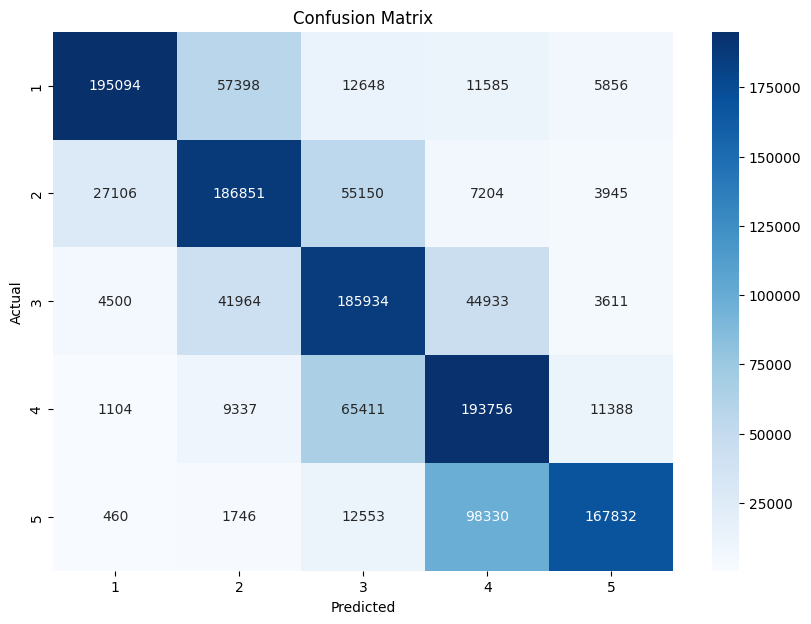

Accuracy: 0.6612, F1 Score: 0.6672


In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Confusion matrix 생성
cm = confusion_matrix(results_df['실제 하차인원'], results_df['예측 하차인원'])

# Confusion matrix 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(results_df['실제 하차인원'], results_df['예측 하차인원'])
# Calculate F1 score
f1 = f1_score(results_df['실제 하차인원'], results_df['예측 하차인원'], average='weighted')
print(f'Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}')

# 7단계로 나타냈을 때

In [1]:
import pandas as pd
import numpy as np
import pickle

# df_2023 = pd.read_csv('data/learningdata2/testdata_2023.csv',encoding='utf-8')

df_2022 = pd.read_csv('data/learningdata2/testdata_2022.csv',encoding='utf-8')
df_2021 = pd.read_csv('data/learningdata2/testdata_2021.csv',encoding='utf-8')

In [2]:
def adjustDf(temp_df):
    return_df = temp_df[['역번호','주말','요일','통과호선수','미세먼지(pm10)','시간','하차인원','공휴일여부','강수량(mm)','최저기온','평균기온','최고기온']]
    # 결측치 제거
    return_df = return_df.dropna()
    # 시간 23시 제거
    return_df = return_df[return_df['시간'] != 23]
    # 하차인원 로그변환
    return_df['하차인원'] = return_df['하차인원'].apply(np.log1p)
    # 하차인원 단계별로 변환
    return_df['하차인원'] = pd.qcut(return_df['하차인원'], 7, labels=[1, 2, 3, 4, 5, 6, 7])
    # Scaler
    columns_to_scale = ['미세먼지(pm10)', '평균기온', '최저기온', '최고기온', '강수량(mm)']
    with open('scaler.pkl', 'rb') as f:
        loaded_scaler = pickle.load(f)
    return_df[columns_to_scale] = loaded_scaler.transform(return_df[columns_to_scale])
    return return_df

In [3]:
adjust_df_2021 = adjustDf(df_2021)
adjust_df_2022 = adjustDf(df_2022)

In [4]:
train_df = pd.concat([adjust_df_2021,adjust_df_2022], ignore_index=True)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424735 entries, 0 to 3424734
Data columns (total 12 columns):
 #   Column      Dtype   
---  ------      -----   
 0   역번호         int64   
 1   주말          int64   
 2   요일          int64   
 3   통과호선수       int64   
 4   미세먼지(pm10)  float64 
 5   시간          int64   
 6   하차인원        category
 7   공휴일여부       int64   
 8   강수량(mm)     float64 
 9   최저기온        float64 
 10  평균기온        float64 
 11  최고기온        float64 
dtypes: category(1), float64(5), int64(6)
memory usage: 290.7 MB


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X = (train_df.drop(['하차인원', '역번호'], axis=1)).values
X_station = (train_df[['역번호']]).values
y = (train_df[['하차인원']]).values

X_train, X_val, X_station_train, X_station_val, y_train, y_val = train_test_split(X, X_station, y, test_size=0.1, random_state=42)

print(X_train.shape, X_val.shape, X_station_train.shape, X_station_val.shape, y_train.shape, y_val.shape)

(3082261, 10) (342474, 10) (3082261, 1) (342474, 1) (3082261, 1) (342474, 1)


In [7]:
# PyTorch 텐서로 변환
X_train_tensor = torch.FloatTensor(X_train)
X_station_train_tensor = torch.LongTensor(X_station_train)  # 역번호는 범주형이므로 LongTensor로 변환
y_train_tensor = torch.LongTensor(y_train)  # 범주형이므로 LongTensor로 변환

X_val_tensor = torch.FloatTensor(X_val)
X_station_val_tensor = torch.LongTensor(X_station_val)
y_val_tensor = torch.LongTensor(y_val)  # 범주형이므로 LongTensor로 변환

# 데이터셋 및 데이터로더 구성
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, X_station_train_tensor, y_train_tensor)
val_dataset = torch.utils.data.TensorDataset(X_val_tensor, X_station_val_tensor, y_val_tensor)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32)

In [8]:
class MLPWithEmbedding3(nn.Module):
    def __init__(self, num_stations, embedding_dim, input_size):
        super(MLPWithEmbedding3, self).__init__()
        # 역번호에 대한 임베딩 레이어
        self.embedding = nn.Embedding(num_stations, embedding_dim)
        
        # 임베딩 레이어와 다른 연속형 피처를 결합한 후 MLP를 구성
        self.fc1 = nn.Linear(embedding_dim + input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 7)  # 출력층을 5개의 뉴런으로 변경
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x_numeric, x_station):
        # 역번호 임베딩 처리
        x_station_embedded = self.embedding(x_station)
        x_station_embedded = x_station_embedded.squeeze(1)  # 임베딩 결과의 차원 조정
        
        # 임베딩된 역번호와 연속형 피처 결합
        x = torch.cat([x_numeric, x_station_embedded], dim=1)
        
        # MLP 모델 진행
        x = self.fc1(x)
        x = self.relu(x)
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        
        x = self.fc3(x)
        return x

In [9]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

num_stations = np.max(X_station_train) + 1

# 모델 초기화
embedding_dim = 8  # 임베딩 벡터의 차원
input_size = X_train.shape[1]  # 연속형 피처 수
model = MLPWithEmbedding3(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()  # 분류 문제이므로 CrossEntropyLoss 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('cuda:0' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

# 학습 및 검증
num_epochs = 200
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for inputs_numeric, inputs_station, targets in train_loader:
        inputs_numeric = inputs_numeric.to(device)
        inputs_station = inputs_station.to(device)
        targets = (targets - 1).to(device).view(-1)  # 타겟 텐서 크기 변환 및 0부터 시작하도록 조정
        
        optimizer.zero_grad()
        outputs = model(inputs_numeric, inputs_station)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs_numeric.size(0)
    
    train_loss = running_loss / len(train_loader.dataset)
    
    # TensorBoard에 학습 손실 기록
    writer.add_scalar('Training Loss', train_loss, epoch)

    # 검증
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs_numeric, inputs_station, targets in val_loader:
            inputs_numeric = inputs_numeric.to(device)
            inputs_station = inputs_station.to(device)
            targets = (targets - 1).to(device).view(-1)
            
            outputs = model(inputs_numeric, inputs_station)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs_numeric.size(0)
    
    val_loss = val_loss / len(val_loader.dataset)
    
    # TensorBoard에 검증 손실 기록
    writer.add_scalar('Validation Loss', val_loss, epoch)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# 학습이 끝난 후 TensorBoard 기록 종료
writer.close()

Epoch [1/200], Train Loss: 1.1704, Validation Loss: 0.9377
Epoch [2/200], Train Loss: 1.0034, Validation Loss: 0.8813
Epoch [3/200], Train Loss: 0.9610, Validation Loss: 0.8610
Epoch [4/200], Train Loss: 0.9367, Validation Loss: 0.8411
Epoch [5/200], Train Loss: 0.9203, Validation Loss: 0.8404
Epoch [6/200], Train Loss: 0.9102, Validation Loss: 0.8268
Epoch [7/200], Train Loss: 0.9023, Validation Loss: 0.8182
Epoch [8/200], Train Loss: 0.8982, Validation Loss: 0.8088
Epoch [9/200], Train Loss: 0.8949, Validation Loss: 0.8004
Epoch [10/200], Train Loss: 0.8924, Validation Loss: 0.8037
Epoch [11/200], Train Loss: 0.8891, Validation Loss: 0.8161
Epoch [12/200], Train Loss: 0.8874, Validation Loss: 0.8001
Epoch [13/200], Train Loss: 0.8854, Validation Loss: 0.7999
Epoch [14/200], Train Loss: 0.8834, Validation Loss: 0.7903
Epoch [15/200], Train Loss: 0.8825, Validation Loss: 0.8139
Epoch [16/200], Train Loss: 0.8813, Validation Loss: 0.7970
Epoch [17/200], Train Loss: 0.8798, Validation Lo

In [10]:
torch.save(model.state_dict(),'category_model_2_weights_1.pth')

### 모델 테스트

In [11]:
df_2023 = pd.read_csv('data/learningdata2/testdata_2023.csv', encoding='utf-8')
adjust_df_2023 = adjustDf(df_2023)
X_2023 = (adjust_df_2023.drop(['하차인원', '역번호'], axis=1)).values
X_station_2023 = (adjust_df_2023[['역번호']]).values
y_2023 = (adjust_df_2023['하차인원']).values

X_2023_tensor = torch.FloatTensor(X_2023)
X_station_2023_tensor = torch.LongTensor(X_station_2023)
y_2023_tensor = torch.LongTensor(y_2023).view(-1, 1)

In [13]:
# Load the trained model
model = MLPWithEmbedding3(num_stations=num_stations, embedding_dim=embedding_dim, input_size=input_size)
model.load_state_dict(torch.load('category_model_2_weights_1.pth'))
model = model.to(device)
model.eval()

# Make predictions
with torch.no_grad():
    X_2023_tensor = X_2023_tensor.to(device)
    X_station_2023_tensor = X_station_2023_tensor.to(device)
    predictions = model(X_2023_tensor, X_station_2023_tensor)
    predicted_classes = torch.argmax(predictions, dim=1) + 1  # Adjusting to match the original class labels

# Convert predictions and true values to numpy arrays
predicted_classes = predicted_classes.cpu().numpy()
y_2023 = y_2023_tensor.cpu().numpy()

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    '역번호': X_station_2023.flatten(),
    '실제 하차인원': y_2023.flatten(),
    '예측 하차인원': predicted_classes.flatten()
})

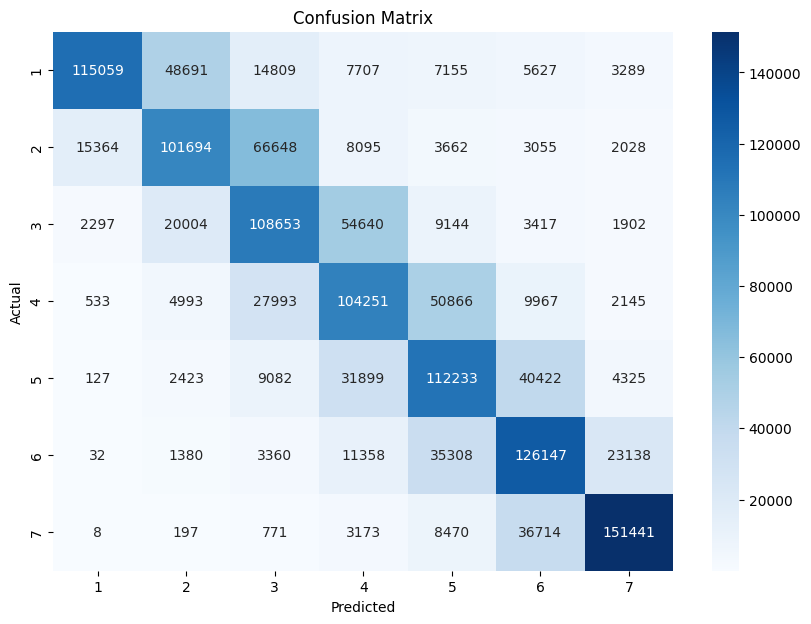

Accuracy: 0.5830, F1 Score: 0.5880


In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Confusion matrix 생성
cm = confusion_matrix(results_df['실제 하차인원'], results_df['예측 하차인원'])

# Confusion matrix 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5, 6, 7], yticklabels=[1, 2, 3, 4, 5, 6, 7])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(results_df['실제 하차인원'], results_df['예측 하차인원'])
# Calculate F1 score
f1 = f1_score(results_df['실제 하차인원'], results_df['예측 하차인원'], average='weighted')
print(f'Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}')

### 임베딩 레이어를 사용 안했을 때

In [16]:
class MLPWithoutEmbedding(nn.Module):
    def __init__(self, input_size):
        super(MLPWithoutEmbedding, self).__init__()
        # 역번호를 포함한 모든 피처를 결합한 후 MLP를 구성
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 5)  # 출력층을 5개의 뉴런으로 변경
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x):
        # MLP 모델 진행
        x = self.fc1(x)
        x = self.relu(x)
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        
        x = self.fc3(x)
        return x

In [17]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

num_stations = np.max(X_station_train) + 1

# 모델 초기화
input_size = X_train.shape[1]  # 연속형 피처 수
model = MLPWithoutEmbedding(input_size=input_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()  # 분류 문제이므로 CrossEntropyLoss 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('cuda:0' if torch.backends.mps.is_built() else 'cpu')
model = model.to(device)

# 학습 및 검증
num_epochs = 200
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for inputs_numeric, _, targets in train_loader:  # 역번호는 사용하지 않음
        inputs_numeric = inputs_numeric.to(device)
        targets = (targets - 1).to(device).view(-1)  # 타겟 텐서 크기 변환 및 0부터 시작하도록 조정
        
        optimizer.zero_grad()
        outputs = model(inputs_numeric)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs_numeric.size(0)
    
    train_loss = running_loss / len(train_loader.dataset)
    
    # TensorBoard에 학습 손실 기록
    writer.add_scalar('Training Loss', train_loss, epoch)

    # 검증
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs_numeric, _, targets in val_loader:  # 역번호는 사용하지 않음
            inputs_numeric = inputs_numeric.to(device)
            targets = (targets - 1).to(device).view(-1)
            
            outputs = model(inputs_numeric)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs_numeric.size(0)
    
    val_loss = val_loss / len(val_loader.dataset)
    
    # TensorBoard에 검증 손실 기록
    writer.add_scalar('Validation Loss', val_loss, epoch)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# 학습이 끝난 후 TensorBoard 기록 종료
writer.close()


Epoch [1/200], Train Loss: 1.4977, Validation Loss: 1.5029
Epoch [2/200], Train Loss: 1.4735, Validation Loss: 1.4989
Epoch [3/200], Train Loss: 1.4713, Validation Loss: 1.5003
Epoch [4/200], Train Loss: 1.4700, Validation Loss: 1.5038
Epoch [5/200], Train Loss: 1.4691, Validation Loss: 1.4863
Epoch [6/200], Train Loss: 1.4681, Validation Loss: 1.5075
Epoch [7/200], Train Loss: 1.4678, Validation Loss: 1.4904
Epoch [8/200], Train Loss: 1.4675, Validation Loss: 1.5019
Epoch [9/200], Train Loss: 1.4670, Validation Loss: 1.5199
Epoch [10/200], Train Loss: 1.4666, Validation Loss: 1.5098
Epoch [11/200], Train Loss: 1.4663, Validation Loss: 1.4951
Epoch [12/200], Train Loss: 1.4661, Validation Loss: 1.4793
Epoch [13/200], Train Loss: 1.4658, Validation Loss: 1.4886
Epoch [14/200], Train Loss: 1.4655, Validation Loss: 1.5169
Epoch [15/200], Train Loss: 1.4657, Validation Loss: 1.5028
Epoch [16/200], Train Loss: 1.4656, Validation Loss: 1.4844
Epoch [17/200], Train Loss: 1.4654, Validation Lo

In [18]:
torch.save(model.state_dict(),'no_embedding_category_model_weights_1.pth')

In [25]:
df_2023 = pd.read_csv('data/learningdata2/testdata_2023.csv', encoding='utf-8')
adjust_df_2023 = adjustDf(df_2023)
X_2023 = adjust_df_2023.drop(['하차인원', '역번호'], axis=1).values
y_2023 = adjust_df_2023['하차인원'].values

X_2023_tensor = torch.FloatTensor(X_2023)
y_2023_tensor = torch.LongTensor(y_2023).view(-1, 1)

# Load the trained model
model = MLPWithoutEmbedding(input_size=input_size)
model.load_state_dict(torch.load('no_embedding_category_model_weights_1.pth'))
model = model.to(device)
model.eval()

# Make predictions
with torch.no_grad():
    X_2023_tensor = X_2023_tensor.to(device)
    predictions = model(X_2023_tensor)
    predicted_classes = torch.argmax(predictions, dim=1) + 1  # Adjusting to match the original class labels

# Convert predictions and true values to numpy arrays
predicted_classes = predicted_classes.cpu().numpy()
y_2023 = y_2023_tensor.cpu().numpy()

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    '역번호': X_2023[:, 0].flatten(),  # 역번호는 X_2023의 첫 번째 열에 위치
    '실제 하차인원': y_2023.flatten(),
    '예측 하차인원': predicted_classes.flatten()
})

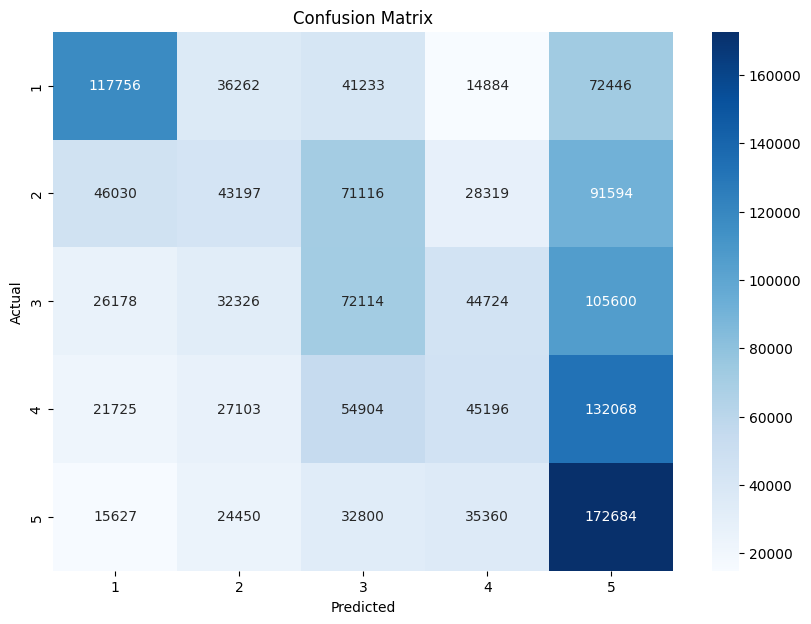

Accuracy: 0.3208, F1 Score: 0.3047


In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Confusion matrix 생성
cm = confusion_matrix(results_df['실제 하차인원'], results_df['예측 하차인원'])

# Confusion matrix 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(results_df['실제 하차인원'], results_df['예측 하차인원'])
# Calculate F1 score
f1 = f1_score(results_df['실제 하차인원'], results_df['예측 하차인원'], average='weighted')
print(f'Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}')